# 연습문제(1) 풀이

## 준비작업

### [1] 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from math import sqrt
from tabulate import tabulate
from pandas import read_excel, DataFrame, melt
from matplotlib import pyplot as plt
from scipy.stats import t, normaltest, bartlett, levene
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

### [2] 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

## 문제 1

### [1] 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/mldata/bread.xlsx")
origin.head()

,무게
0,482
1,479
2,485
3,474
4,479


### [2] 데이터 분포 확인

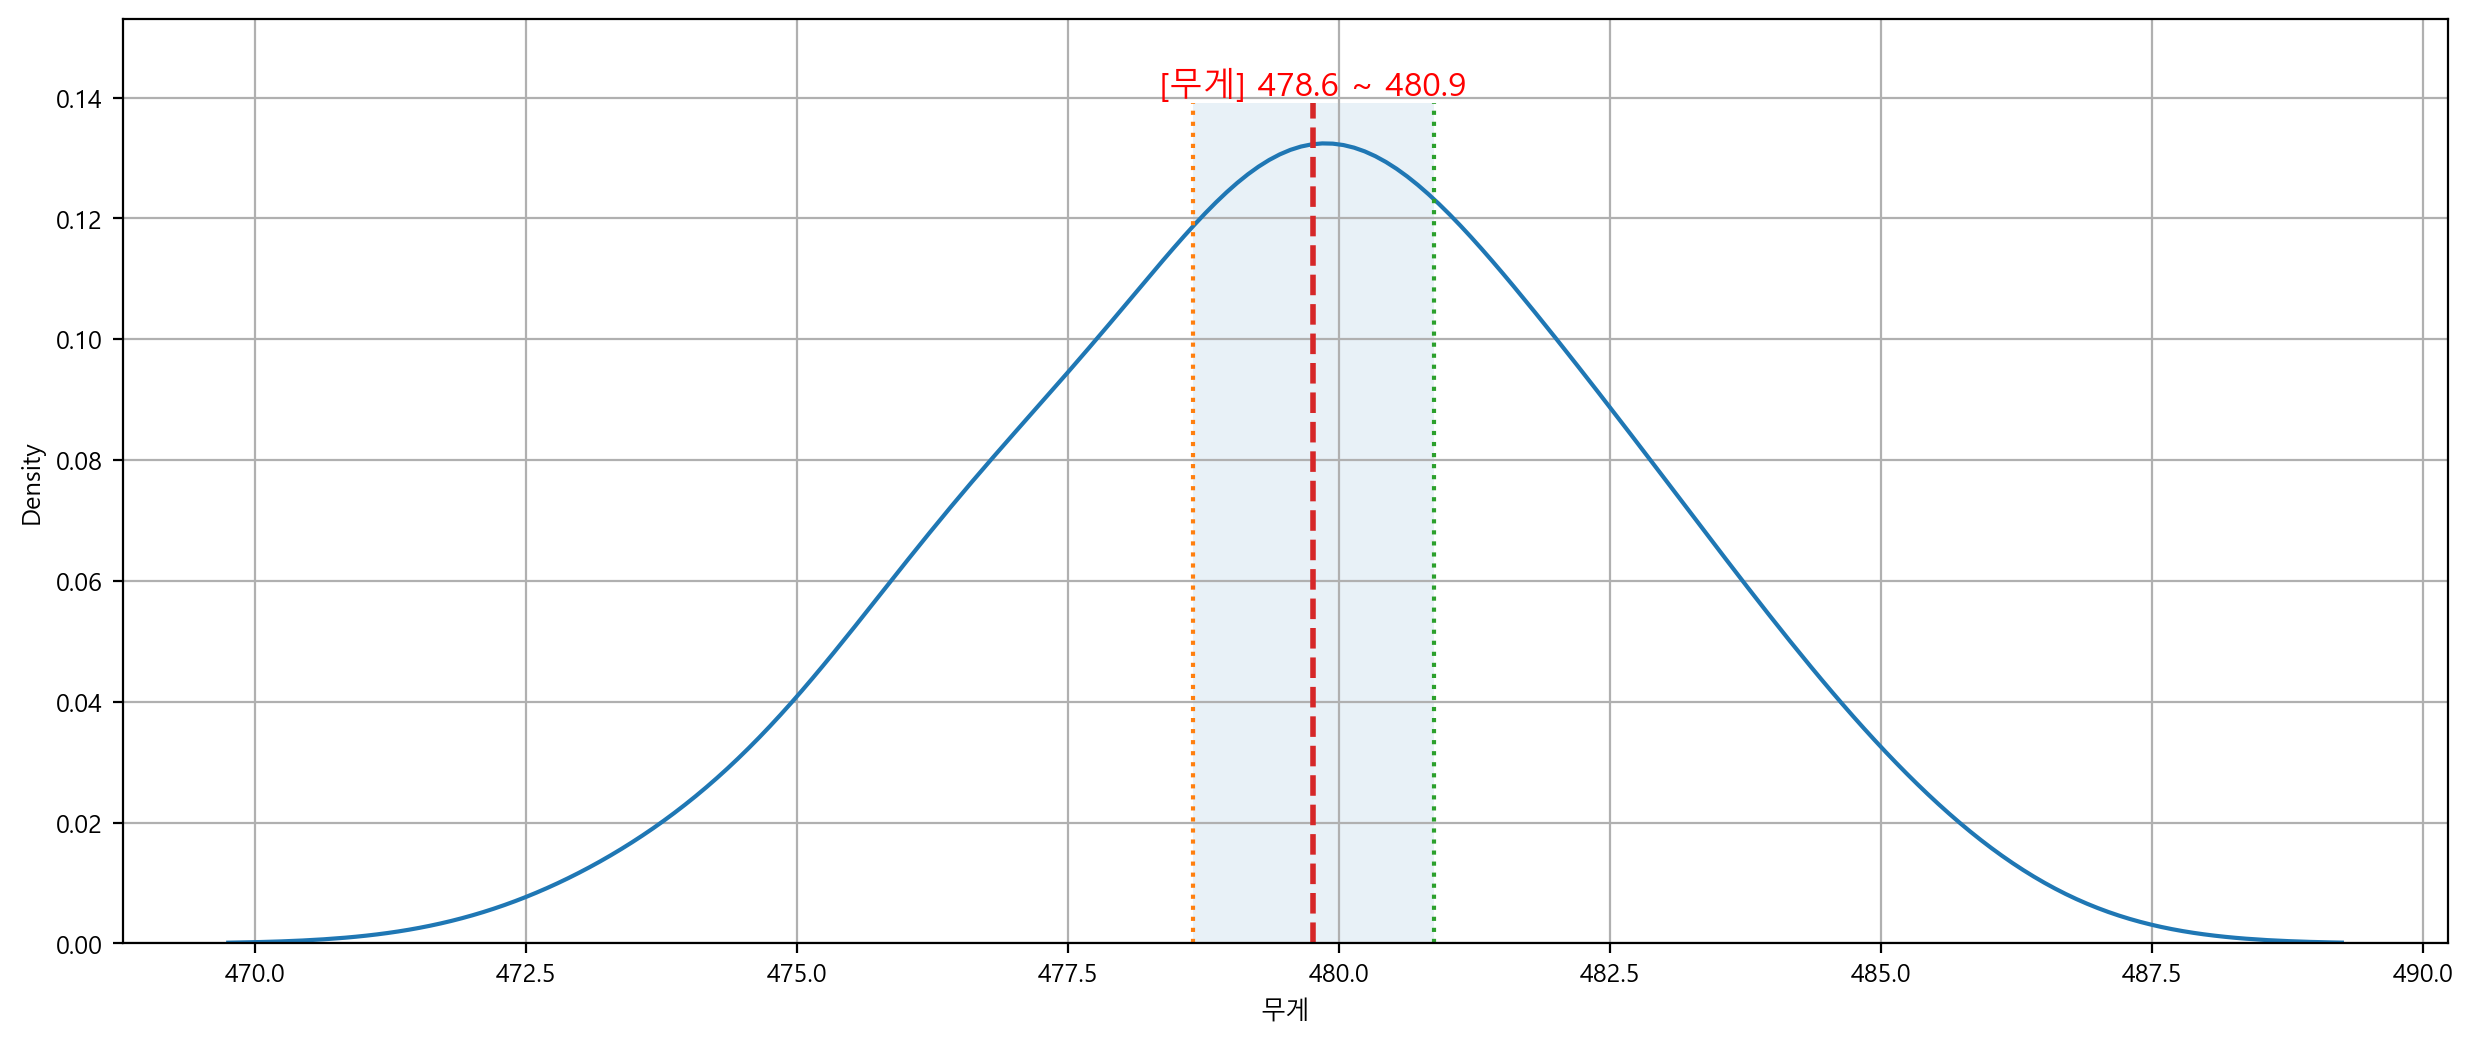

In [4]:
plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]  # 체온 데이터만 추출
    max = data.max()      # 최대값
    clevel = 0.95           # 신뢰수준
    dof = len(data) - 1   # 자유도
    sample_mean = data.mean()  # 표본평균
    sample_std = data.std(ddof=1) # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

plt.grid()
plt.show()
plt.close()

### [3] 정규성 검정

In [5]:
for c in origin.columns:
    s, p = normaltest(origin[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[무게] statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True


### [4] 단일표본 T검정

In [6]:
data = origin.copy()
alternative = ["two-sided", "less", "greater"]
mean_value = 500
result = []

for c in data.columns:
    for a in alternative:
        s, p = ttest_1samp(data[c], mean_value, alternative=a)

        itp = None

        if a == "two-sided":
            itp = "μ {0} {1}".format("==" if p > 0.05 else "!=", mean_value)
        elif a == "less":
            itp = "μ {0} {1}".format(">=" if p > 0.05 else "<", mean_value)
        else:
            itp = "μ {0} {1}".format("<=" if p > 0.05 else ">", mean_value)

        result.append({
            "field": c,
            "alternative": a,
            "statistic": s,
            "p-value": p,
            "H0": p > 0.05,
            "H1": p <= 0.05,
            "interpretation": itp
        })

rdf = DataFrame(result)
rdf.set_index(["field", "alternative"], inplace=True)
rdf

statistic       p-value     H0     H1 interpretation
field alternative                                                      
무게    two-sided   -37.524401  7.973017e-23  False   True       μ != 500
      less        -37.524401  3.986508e-23  False   True        μ < 500
      greater     -37.524401  1.000000e+00   True  False       μ <= 500

> 빵의 무게에 대한 단일표본 T검정 결과 양측검정(two-sided)에서 빵의 무게가 500이 아닌 것으로 확인되었다($P \leq 0.05$).
> 
> 또한 단측검정(less, greater)에서는 빵의 무게가 500보다 작은 것으로 확인되었다($P \leq 0.05$).
> 
> 그러므로 해당 빵집에 클래임을 걸어야 한다.

## 문제 2

### [1] 데이터 가져오기

In [7]:
origin = read_excel("https://data.hossam.kr/mldata/material.xlsx")
origin

,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0
5,80.4,82.3
6,81.6,81.0
7,79.9,80.2
8,84.4,82.2
9,80.9,82.3


### [2] 데이터 분포 확인

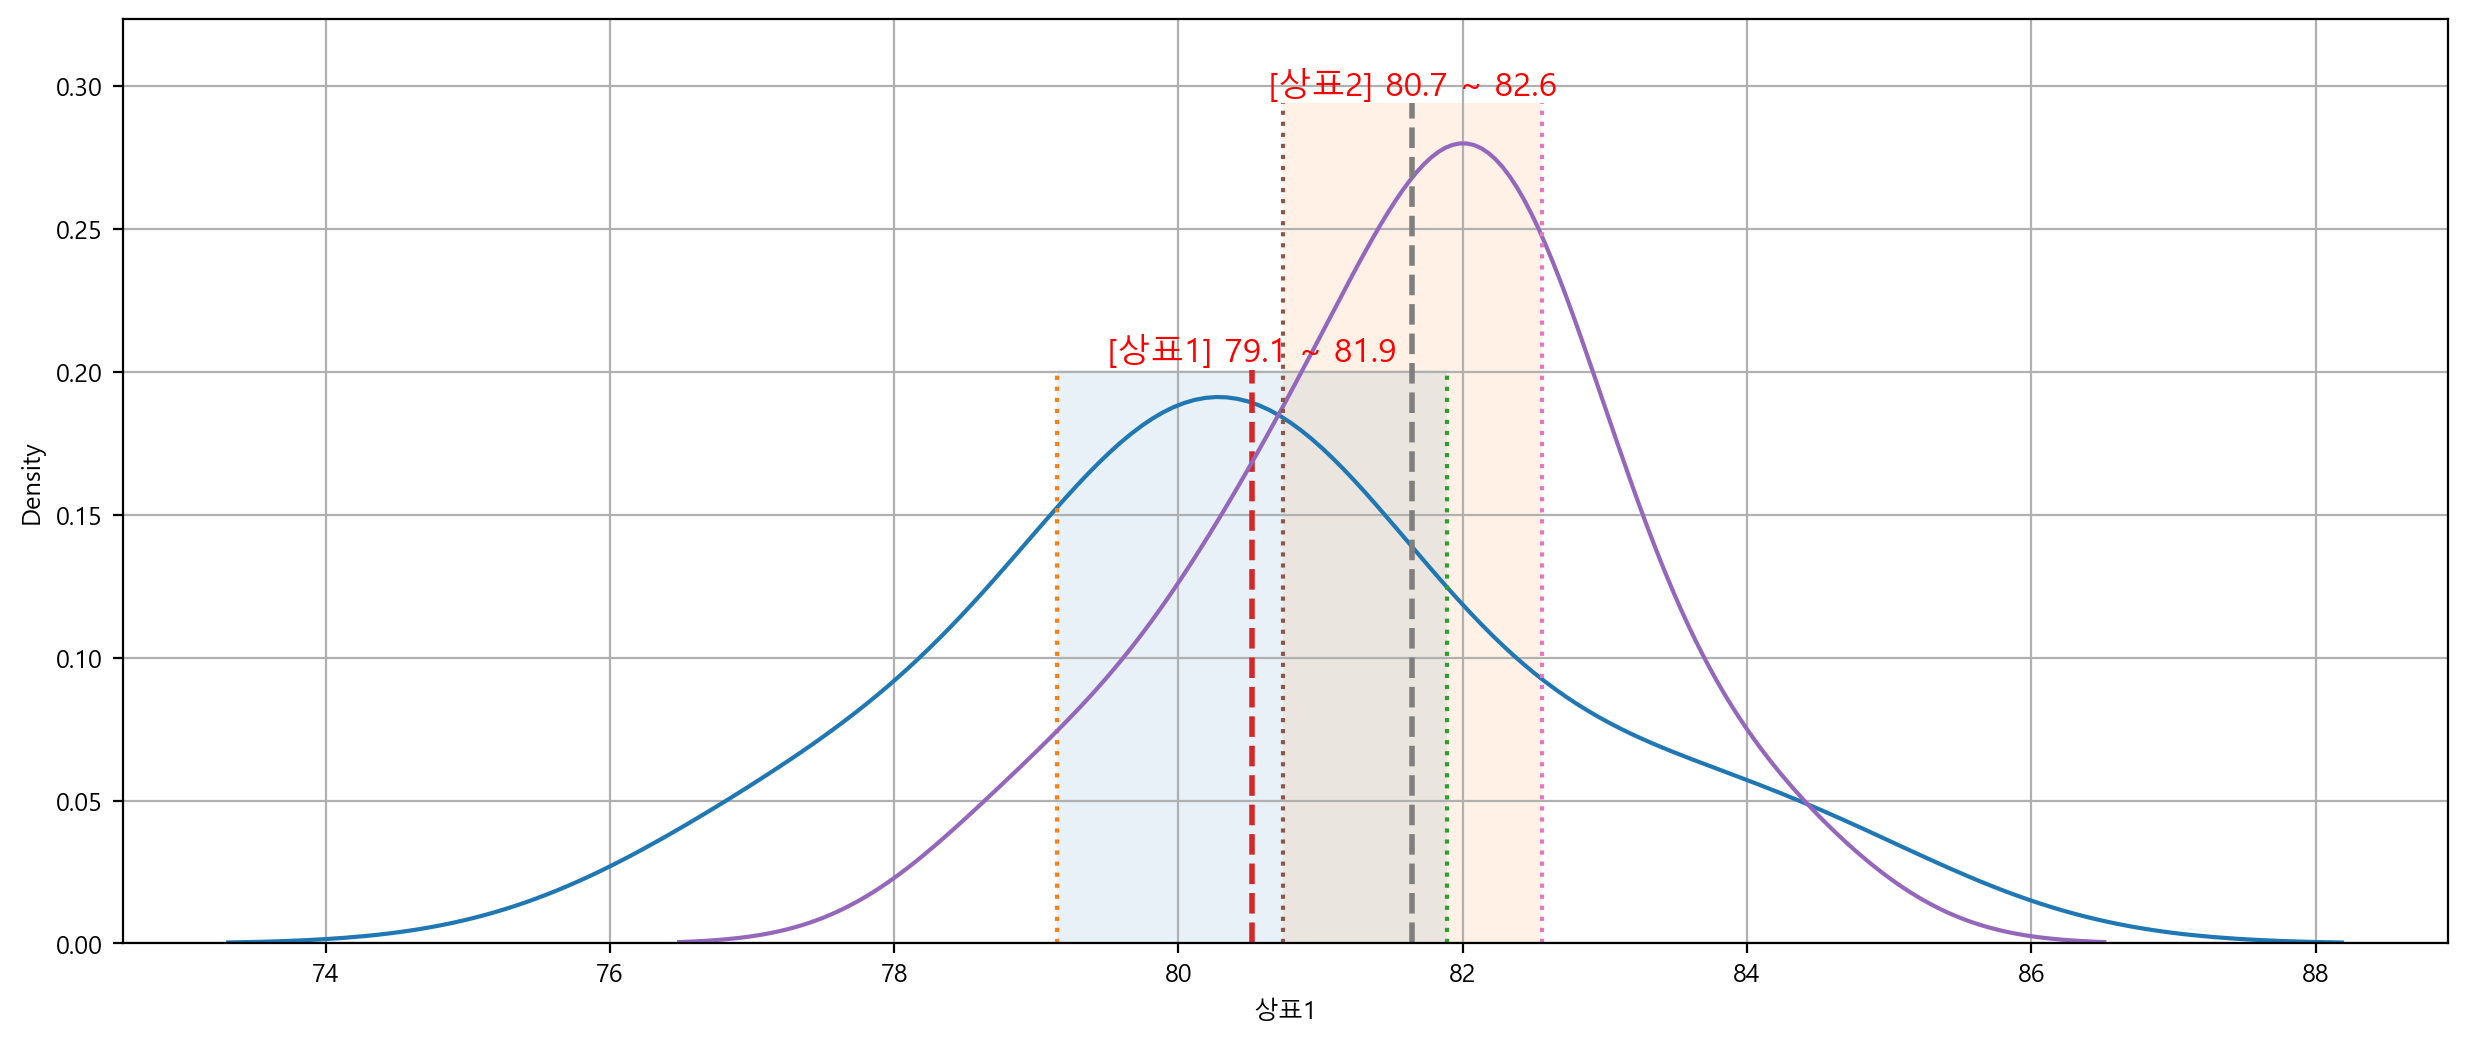

In [8]:
plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]  # 체온 데이터만 추출
    max = data.max()      # 최대값
    clevel = 0.95           # 신뢰수준
    dof = len(data) - 1   # 자유도
    sample_mean = data.mean()  # 표본평균
    sample_std = data.std(ddof=1) # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

plt.grid()
plt.show()
plt.close()

### [3] 데이터 정규성, 등분산성 확인

In [9]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사

# 정규성 확인
for c in data.columns:
    s, p = normaltest(data[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))
    normal_dist = normal_dist and (p > 0.05)


# 등분산성 확인
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

[상표1] statistic: 0.638, p-value: 0.727, 정규성 충족 여부: True
[상표2] statistic: 0.775, p-value: 0.679, 정규성 충족 여부: True
[Bartlett 검정] statistic: 1.555, p-value: 0.212, 등분산성 충족 여부: True


### [4] 독립 표본 T검정

In [10]:
df = origin.copy()
alternative = ["two-sided", "less", "greater"]
result = []
fields = ['상표1', '상표2']
fmt = "μ({f0}) {0} μ({f1})"
equal_var = True

for a in alternative:
    s, p = ttest_ind(df[fields[0]], df[fields[1]], alternative=a, equal_var=equal_var)

    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
    elif a == "less":
        itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
    else:
        itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

    result.append({
        "alternative": a,
        "statistic": s,
        "p-value": p,
        "H0": p > 0.05,
        "H1": p <= 0.05,
        "interpretation": itp
    })

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-1.528327,0.142093,True,False,μ(상표1) == μ(상표2)
less,-1.528327,0.071047,True,False,μ(상표1) >= μ(상표2)
greater,-1.528327,0.928953,True,False,μ(상표1) <= μ(상표2)


> 두 상표의 화학약품에 대한 주성분 A 함량을 비교하기 위해 독립표본 T검정을 수행한 결과 두 상품의 주성분 함량은 통계적으로 유의한 차이를 보이지 않는 것으로 확인되었다.($P > 0.05$).

### [5] 검정 결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


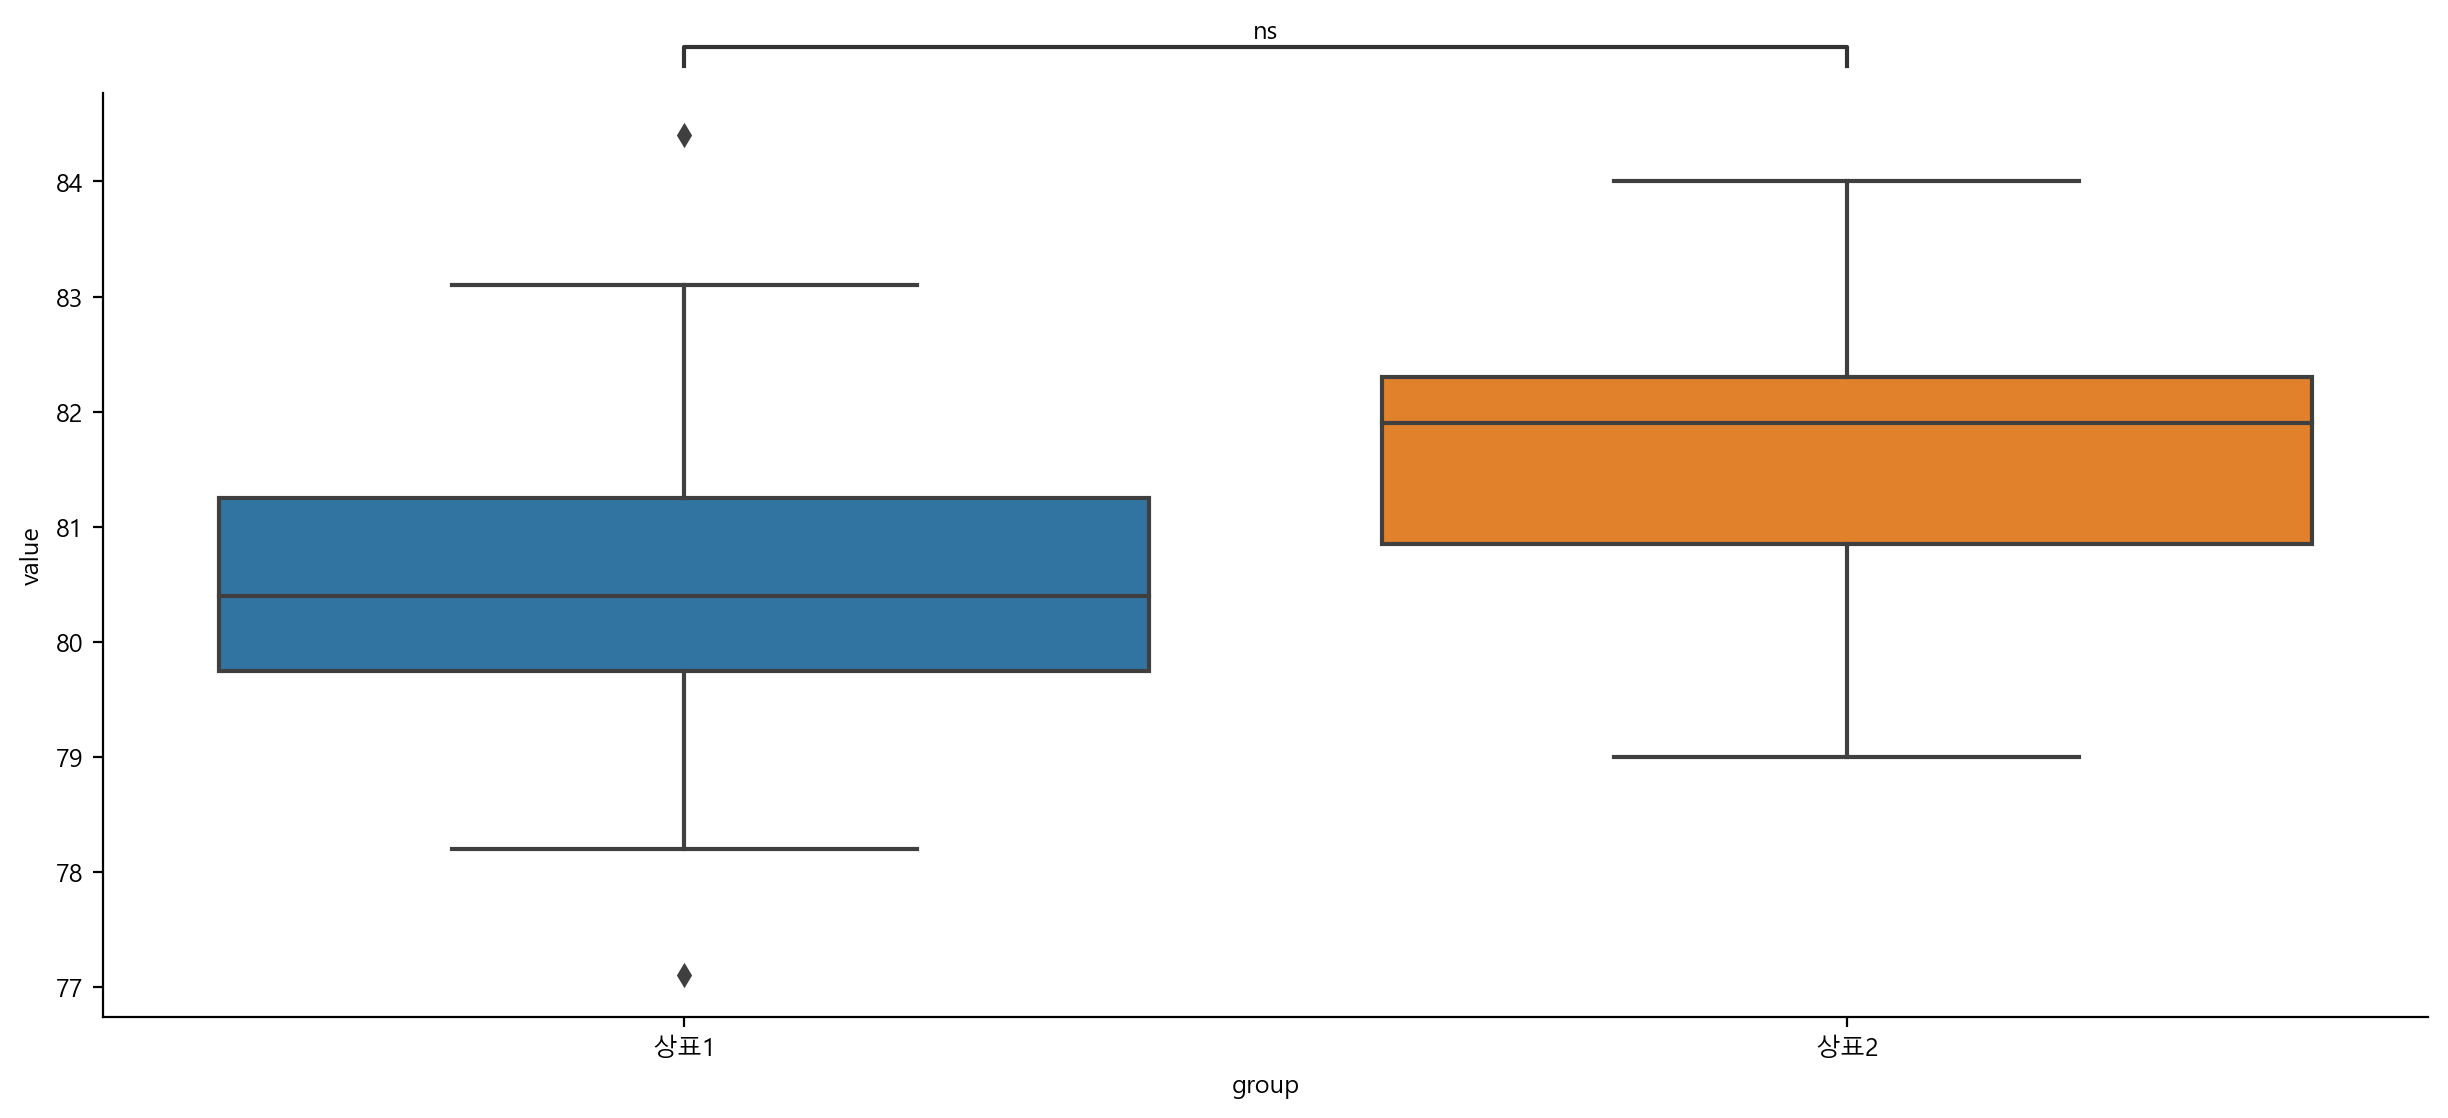

In [11]:
df = melt(origin, var_name="group", value_name="value")

config = {
    "data": df,
    "x": "group",
    "y": "value",
    "pairs": [("상표1", "상표2")],
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "outside"
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 문제 3

### [1] 데이터 가져오기

In [12]:
origin = read_excel("https://data.hossam.kr/mldata/blood_pressure.xlsx")
origin

,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


### [2] 정규성, 등분산성 확인

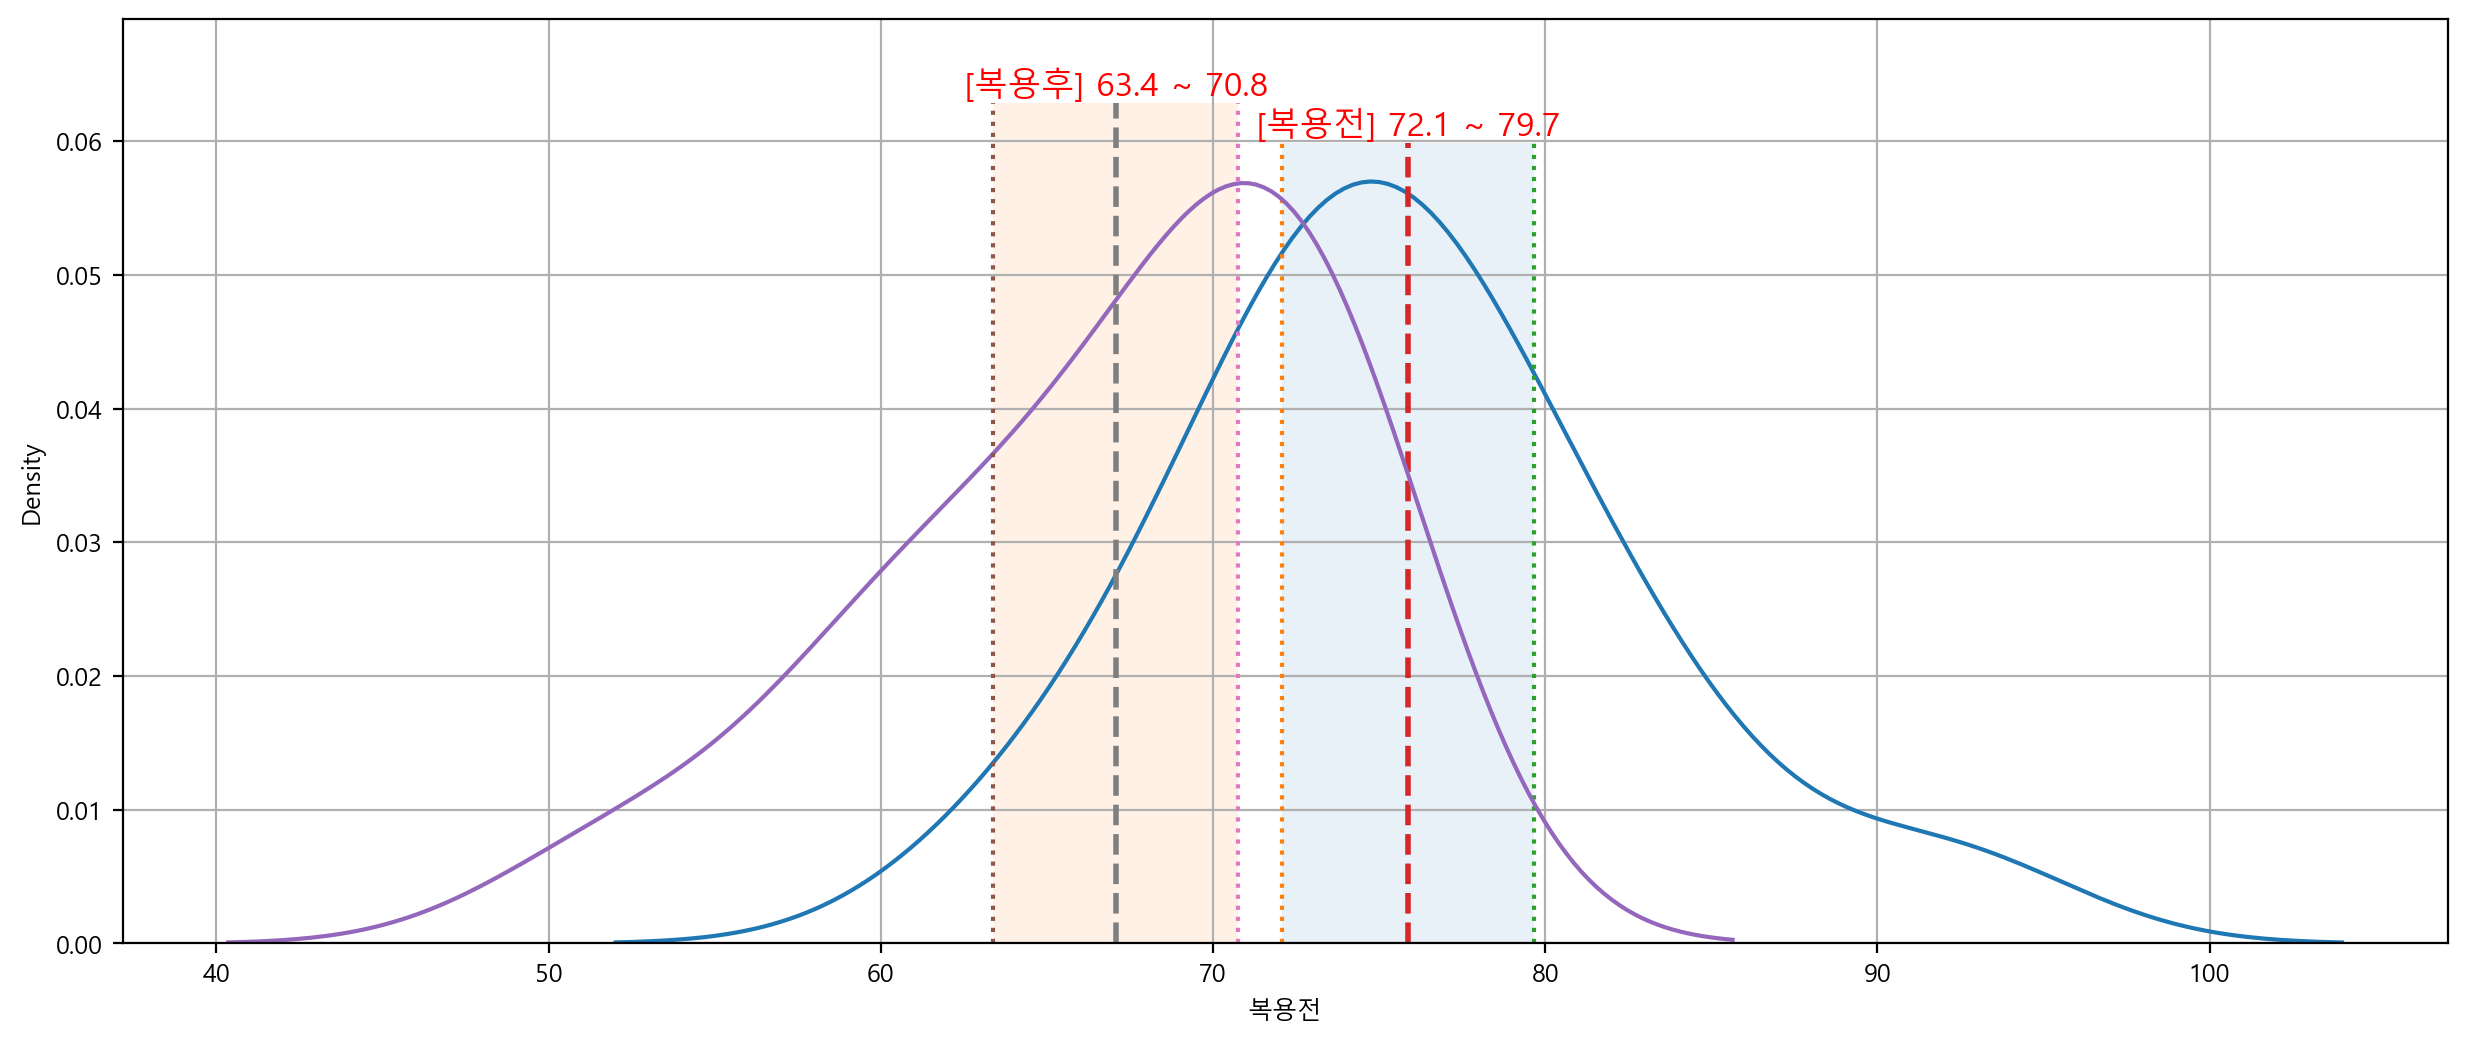

[복용전] statistic: 2.591, p-value: 0.274, 정규성 충족 여부: True
[복용후] statistic: 2.656, p-value: 0.265, 정규성 충족 여부: True
[Bartlett 검정] statistic: 0.011, p-value: 0.916, 등분산성 충족 여부: True


In [13]:
#----------------------------------------
# 커널 밀도 함수 + 신뢰구간 그래프
plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]  # 체온 데이터만 추출
    max = data.max()      # 최대값
    clevel = 0.95           # 신뢰수준
    dof = len(data) - 1   # 자유도
    sample_mean = data.mean()  # 표본평균
    sample_std = data.std(ddof=1) # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

plt.grid()
plt.show()
plt.close()


#----------------------------------------
# 정규성 확인
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사

for c in data.columns:
    s, p = normaltest(data[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))
    normal_dist = normal_dist and (p > 0.05)


#----------------------------------------
# 등분산성 확인
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

### [3] 대응표본 T-Test

In [14]:
df = origin.copy()
alternative = ["two-sided", "less", "greater"]
result = []
fields = ['복용전', '복용후']
fmt = "μ({f0}) {0} μ({f1})"
equal_var = True

for a in alternative:
    if equal_var:
        s, p = ttest_rel(df[fields[0]], df[fields[1]], alternative=a)
    else:
        s, p = mannwhitneyu(df[fields[0]], df[fields[1]], alternative=a)

    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
    elif a == "less":
        itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
    else:
        itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

    result.append({
        "alternative": a,
        "statistic": s,
        "p-value": p,
        "H0": p > 0.05,
        "H1": p <= 0.05,
        "interpretation": itp
    })

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,3.10536,0.007749,False,True,μ(복용전) != μ(복용후)
less,3.10536,0.996125,True,False,μ(복용전) >= μ(복용후)
greater,3.10536,0.003875,False,True,μ(복용전) > μ(복용후)


> 특정 피임약이 사용자의 혈압에 미치는 영향을 확인하기 위해 대응표본 T검정을 수행한 결과 복용후의 혈압이 복용전 혈압보다 유의미하게 낮은것으로 확인되었다($P \leq 0.05$).

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

복용전 vs. 복용후: t-test paired samples, P_val:7.749e-03 t=3.105e+00


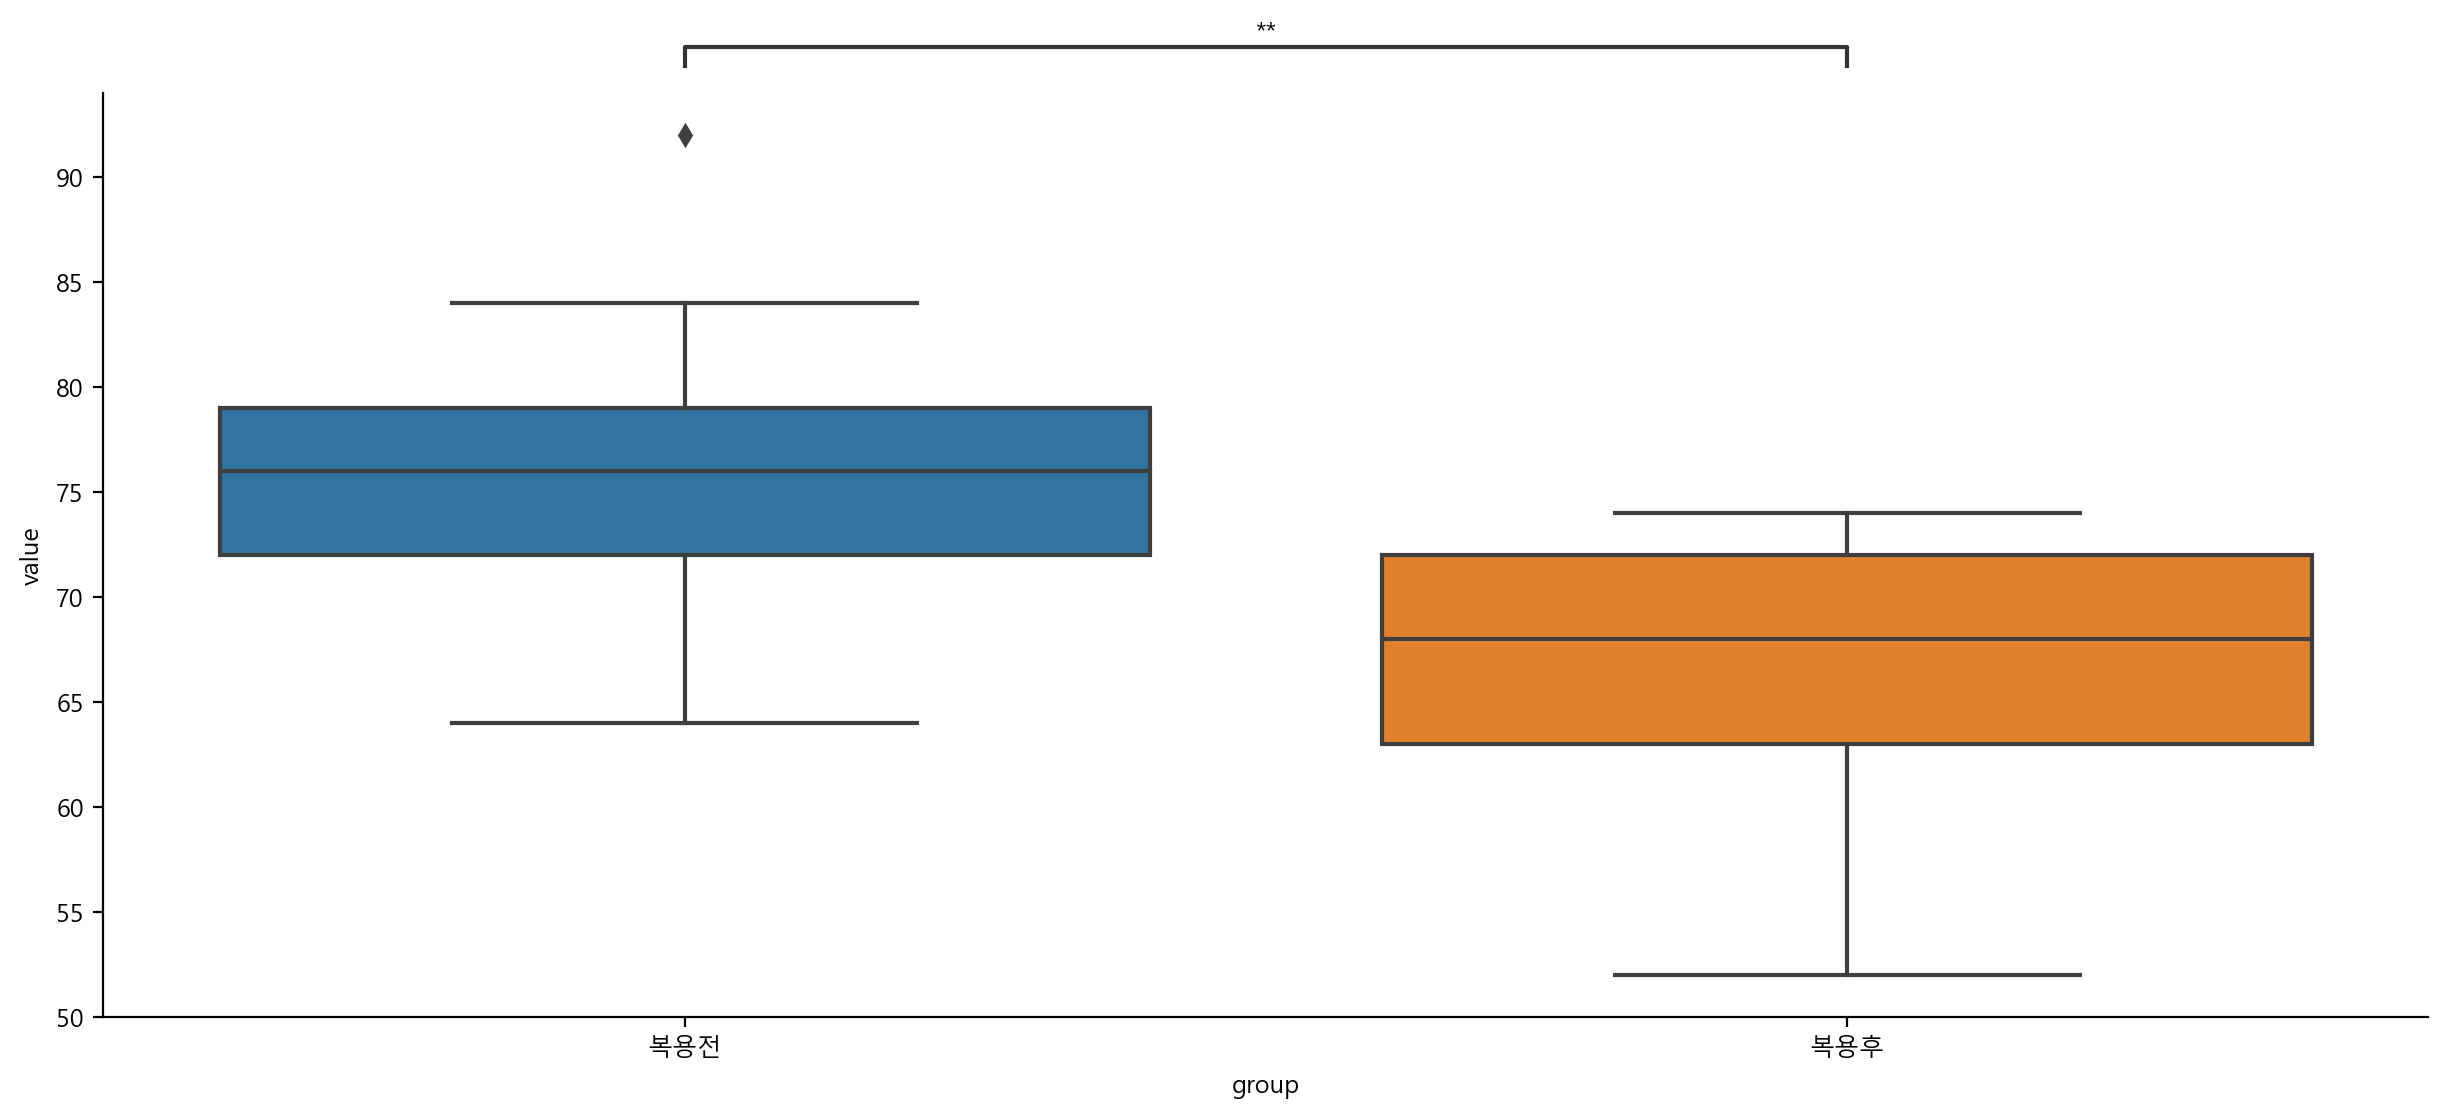

In [15]:
df = melt(origin, var_name="group", value_name="value")

config = {
    "data": df,
    "x": "group",
    "y": "value",
    "pairs": [("복용전", "복용후")],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 문제 4

### [1] 데이터 가져오기

In [16]:
origin = read_excel("https://data.hossam.kr/mldata/runner_diet.xlsx")
origin

,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


### [2] 커널밀도함수 + 신뢰구간 확인

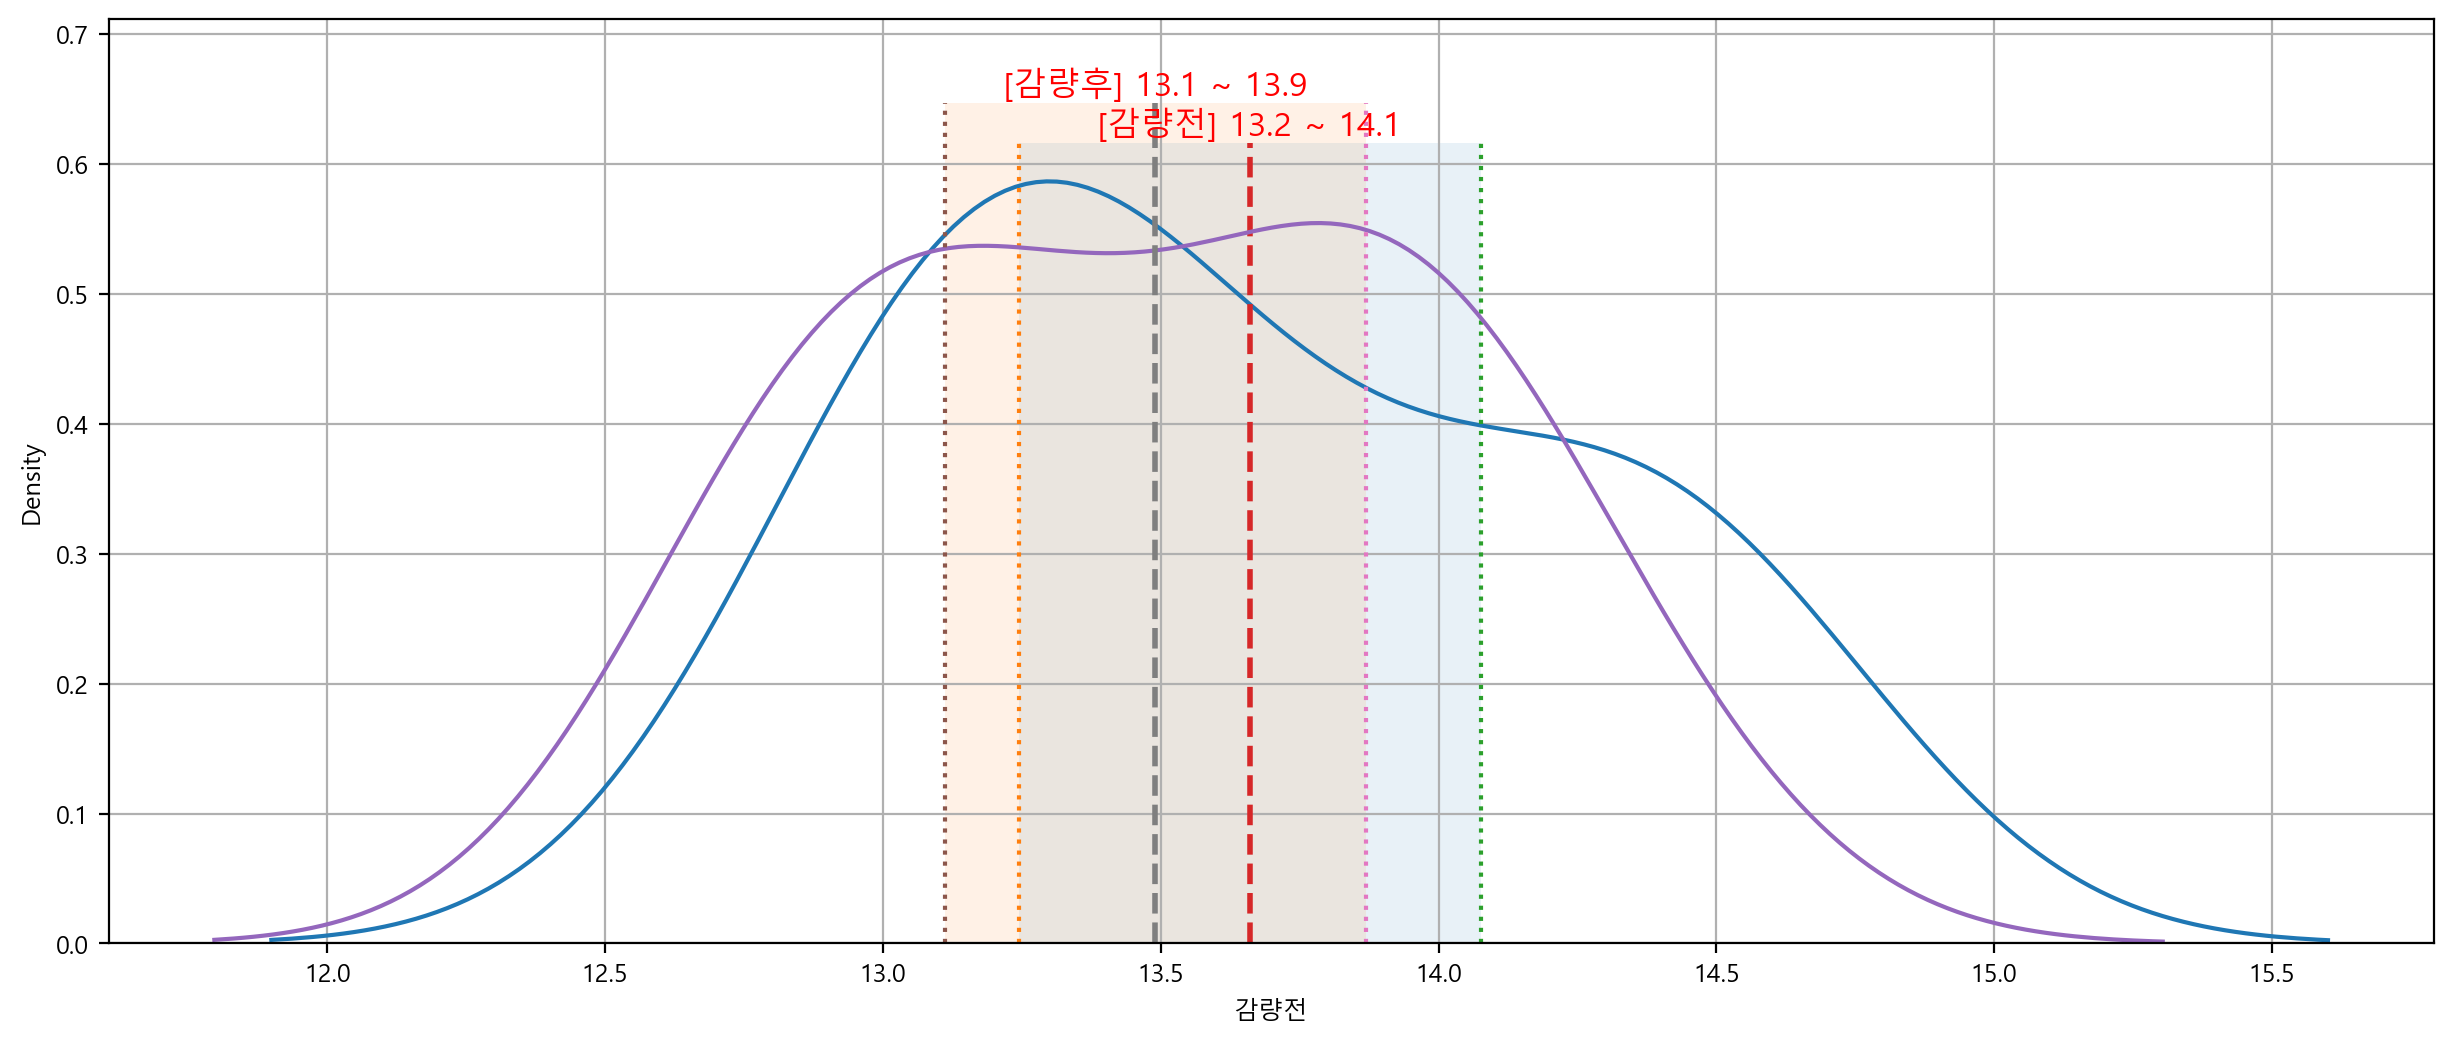

In [17]:
plt.figure()

for c in origin.columns:
    #print(c)

    data = origin[c]  # 체온 데이터만 추출
    max = data.max()      # 최대값
    clevel = 0.95           # 신뢰수준
    dof = len(data) - 1   # 자유도
    sample_mean = data.mean()  # 표본평균
    sample_std = data.std(ddof=1) # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax*1.1)

plt.grid()
plt.show()
plt.close()

### [3] 정규성, 등분산성 확인

In [18]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사

# 정규성 확인
for c in data.columns:
    s, p = normaltest(data[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))
    normal_dist = normal_dist and (p > 0.05)


# 등분산성 확인
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

[감량전] statistic: 2.063, p-value: 0.356, 정규성 충족 여부: True
[감량후] statistic: 1.647, p-value: 0.439, 정규성 충족 여부: True
[Bartlett 검정] statistic: 0.073, p-value: 0.787, 등분산성 충족 여부: True


### [3] 대응표본 T검정

In [19]:
df = origin.copy()
alternative = ["two-sided", "less", "greater"]
result = []
fields = ['감량전', '감량후']
fmt = "μ({f0}) {0} μ({f1})"
equal_var = True

for a in alternative:
    if equal_var:
        s, p = ttest_rel(df[fields[0]], df[fields[1]], alternative=a)
    else:
        s, p = mannwhitneyu(df[fields[0]], df[fields[1]], alternative=a)

    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
    elif a == "less":
        itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
    else:
        itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

    result.append({
        "alternative": a,
        "statistic": s,
        "p-value": p,
        "H0": p > 0.05,
        "H1": p <= 0.05,
        "interpretation": itp
    })

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,2.375307,0.041546,False,True,μ(감량전) != μ(감량후)
less,2.375307,0.979227,True,False,μ(감량전) >= μ(감량후)
greater,2.375307,0.020773,False,True,μ(감량전) > μ(감량후)


> 체중 감량이 육상 선수의 속도에 주는 영향을 알아보기 위해 감량 전후에 대한 대응표본 T검정을 수행한 결과 체중 감량후 속도가 유의미하게 빨라진 것을 확인하였다($P \leq 0.05$)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 vs. 감량후: t-test paired samples, P_val:4.155e-02 t=2.375e+00


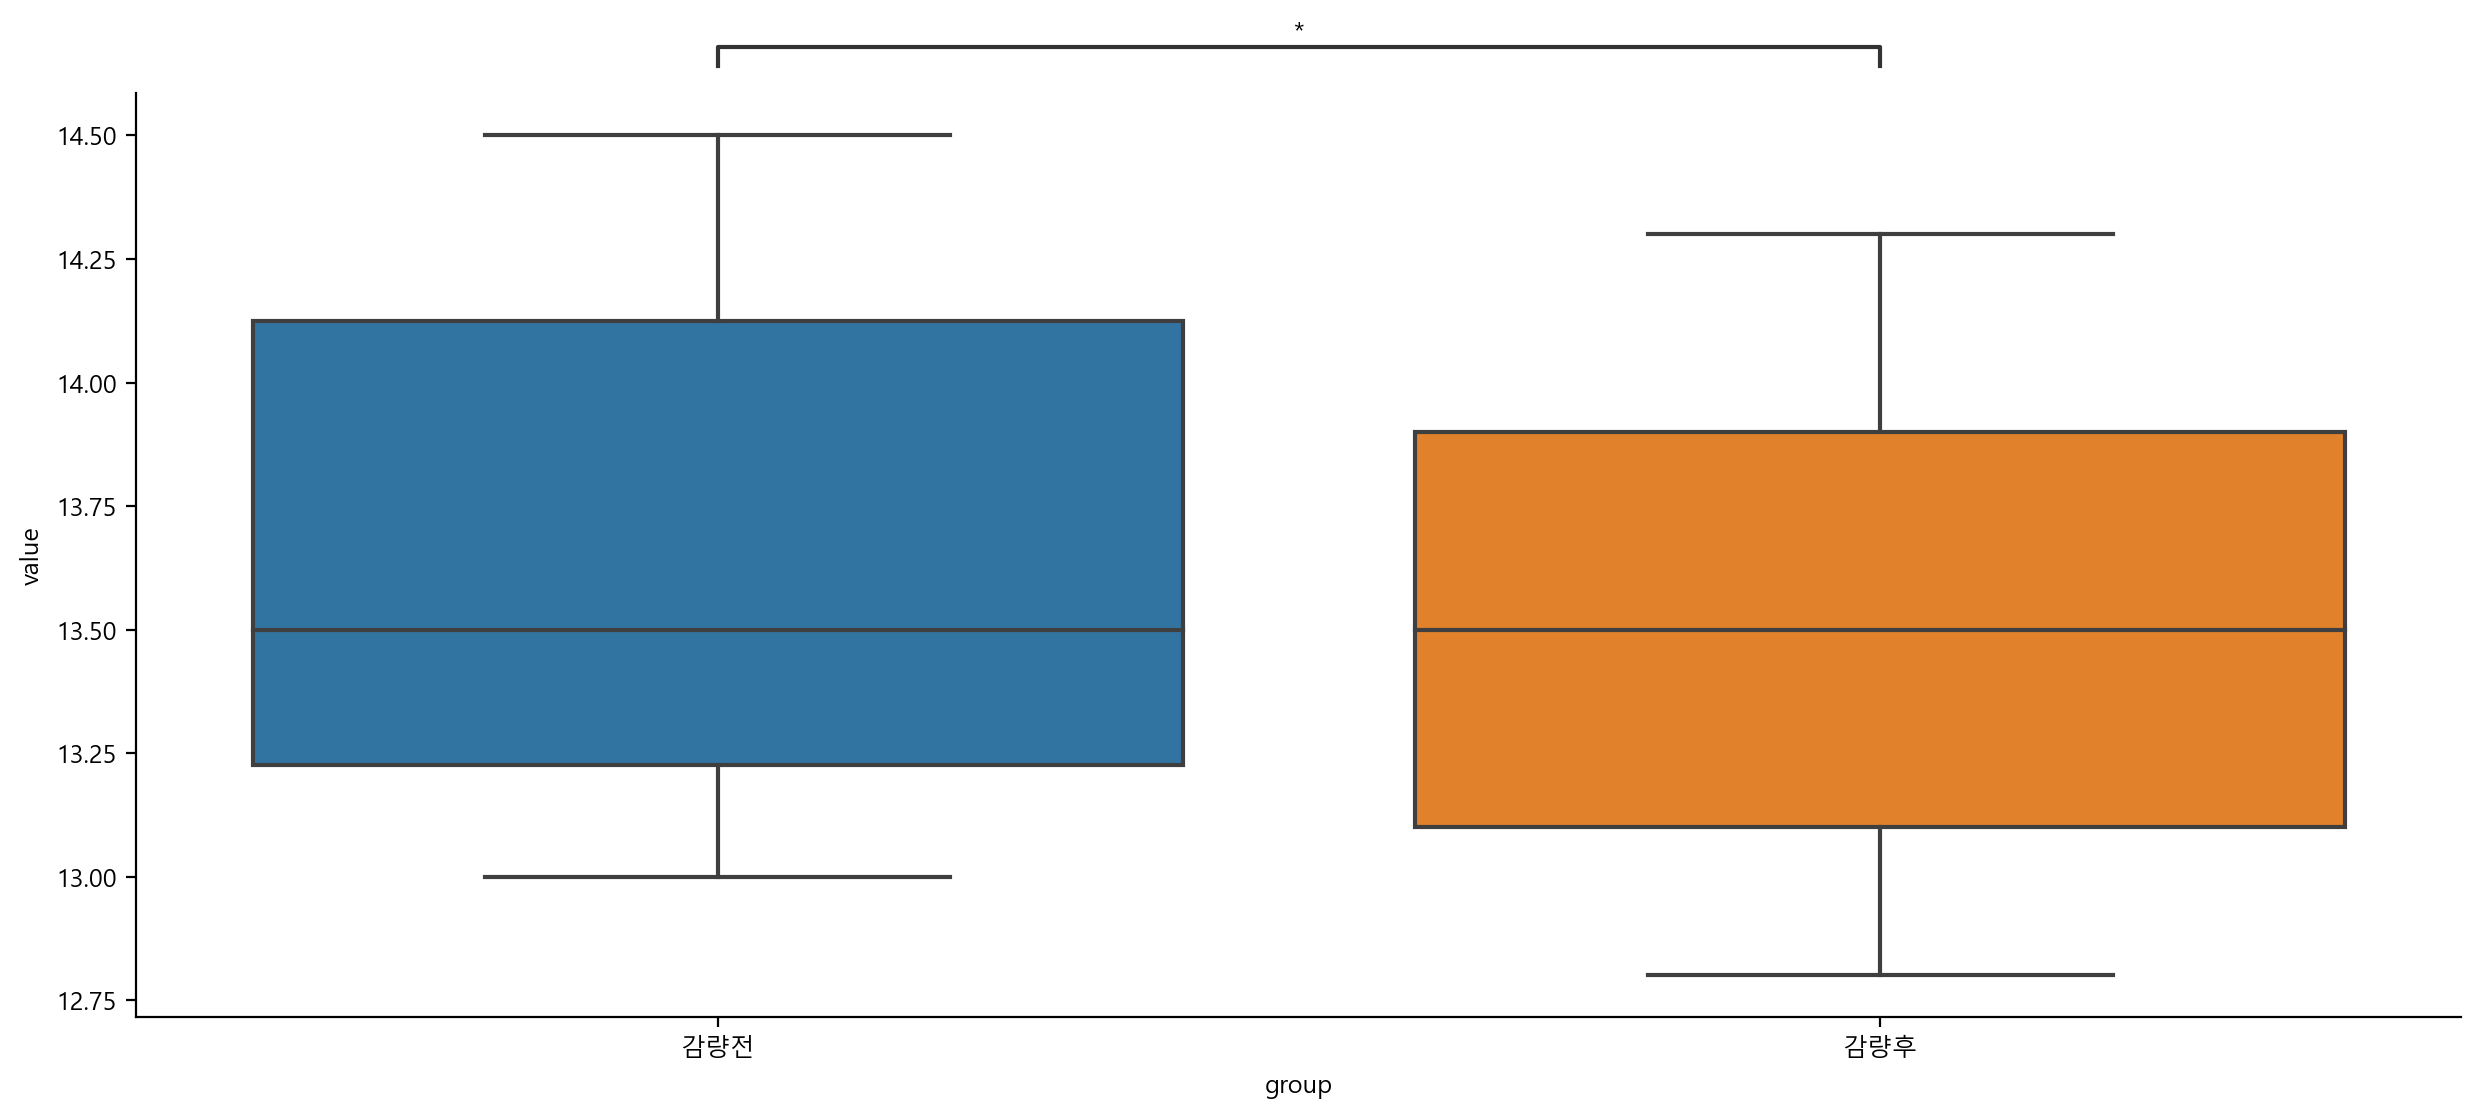

In [20]:
df = melt(origin, var_name="group", value_name="value")

config = {
    "data": df,
    "x": "group",
    "y": "value",
    "pairs": [("감량전", "감량후")],
    "test": "t-test_paired",
    "text_format": "star",
    "loc": "outside",
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

## 문제 5

### [1] 데이터 가져오기

In [21]:
origin = read_excel("https://data.hossam.kr/mldata/wrestler_diet.xlsx", index_col='이름')
origin.head()

,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
이름,,,,,,
B.S,43,41,35,41,25,29
P.J,42,41,40,44,25,29
G.G,52,50,36,41,22,23
A.L,53,52,38,42,10,15
I.H,44,40,36,42,15,19


### [2] KDE, 신뢰구간 확인

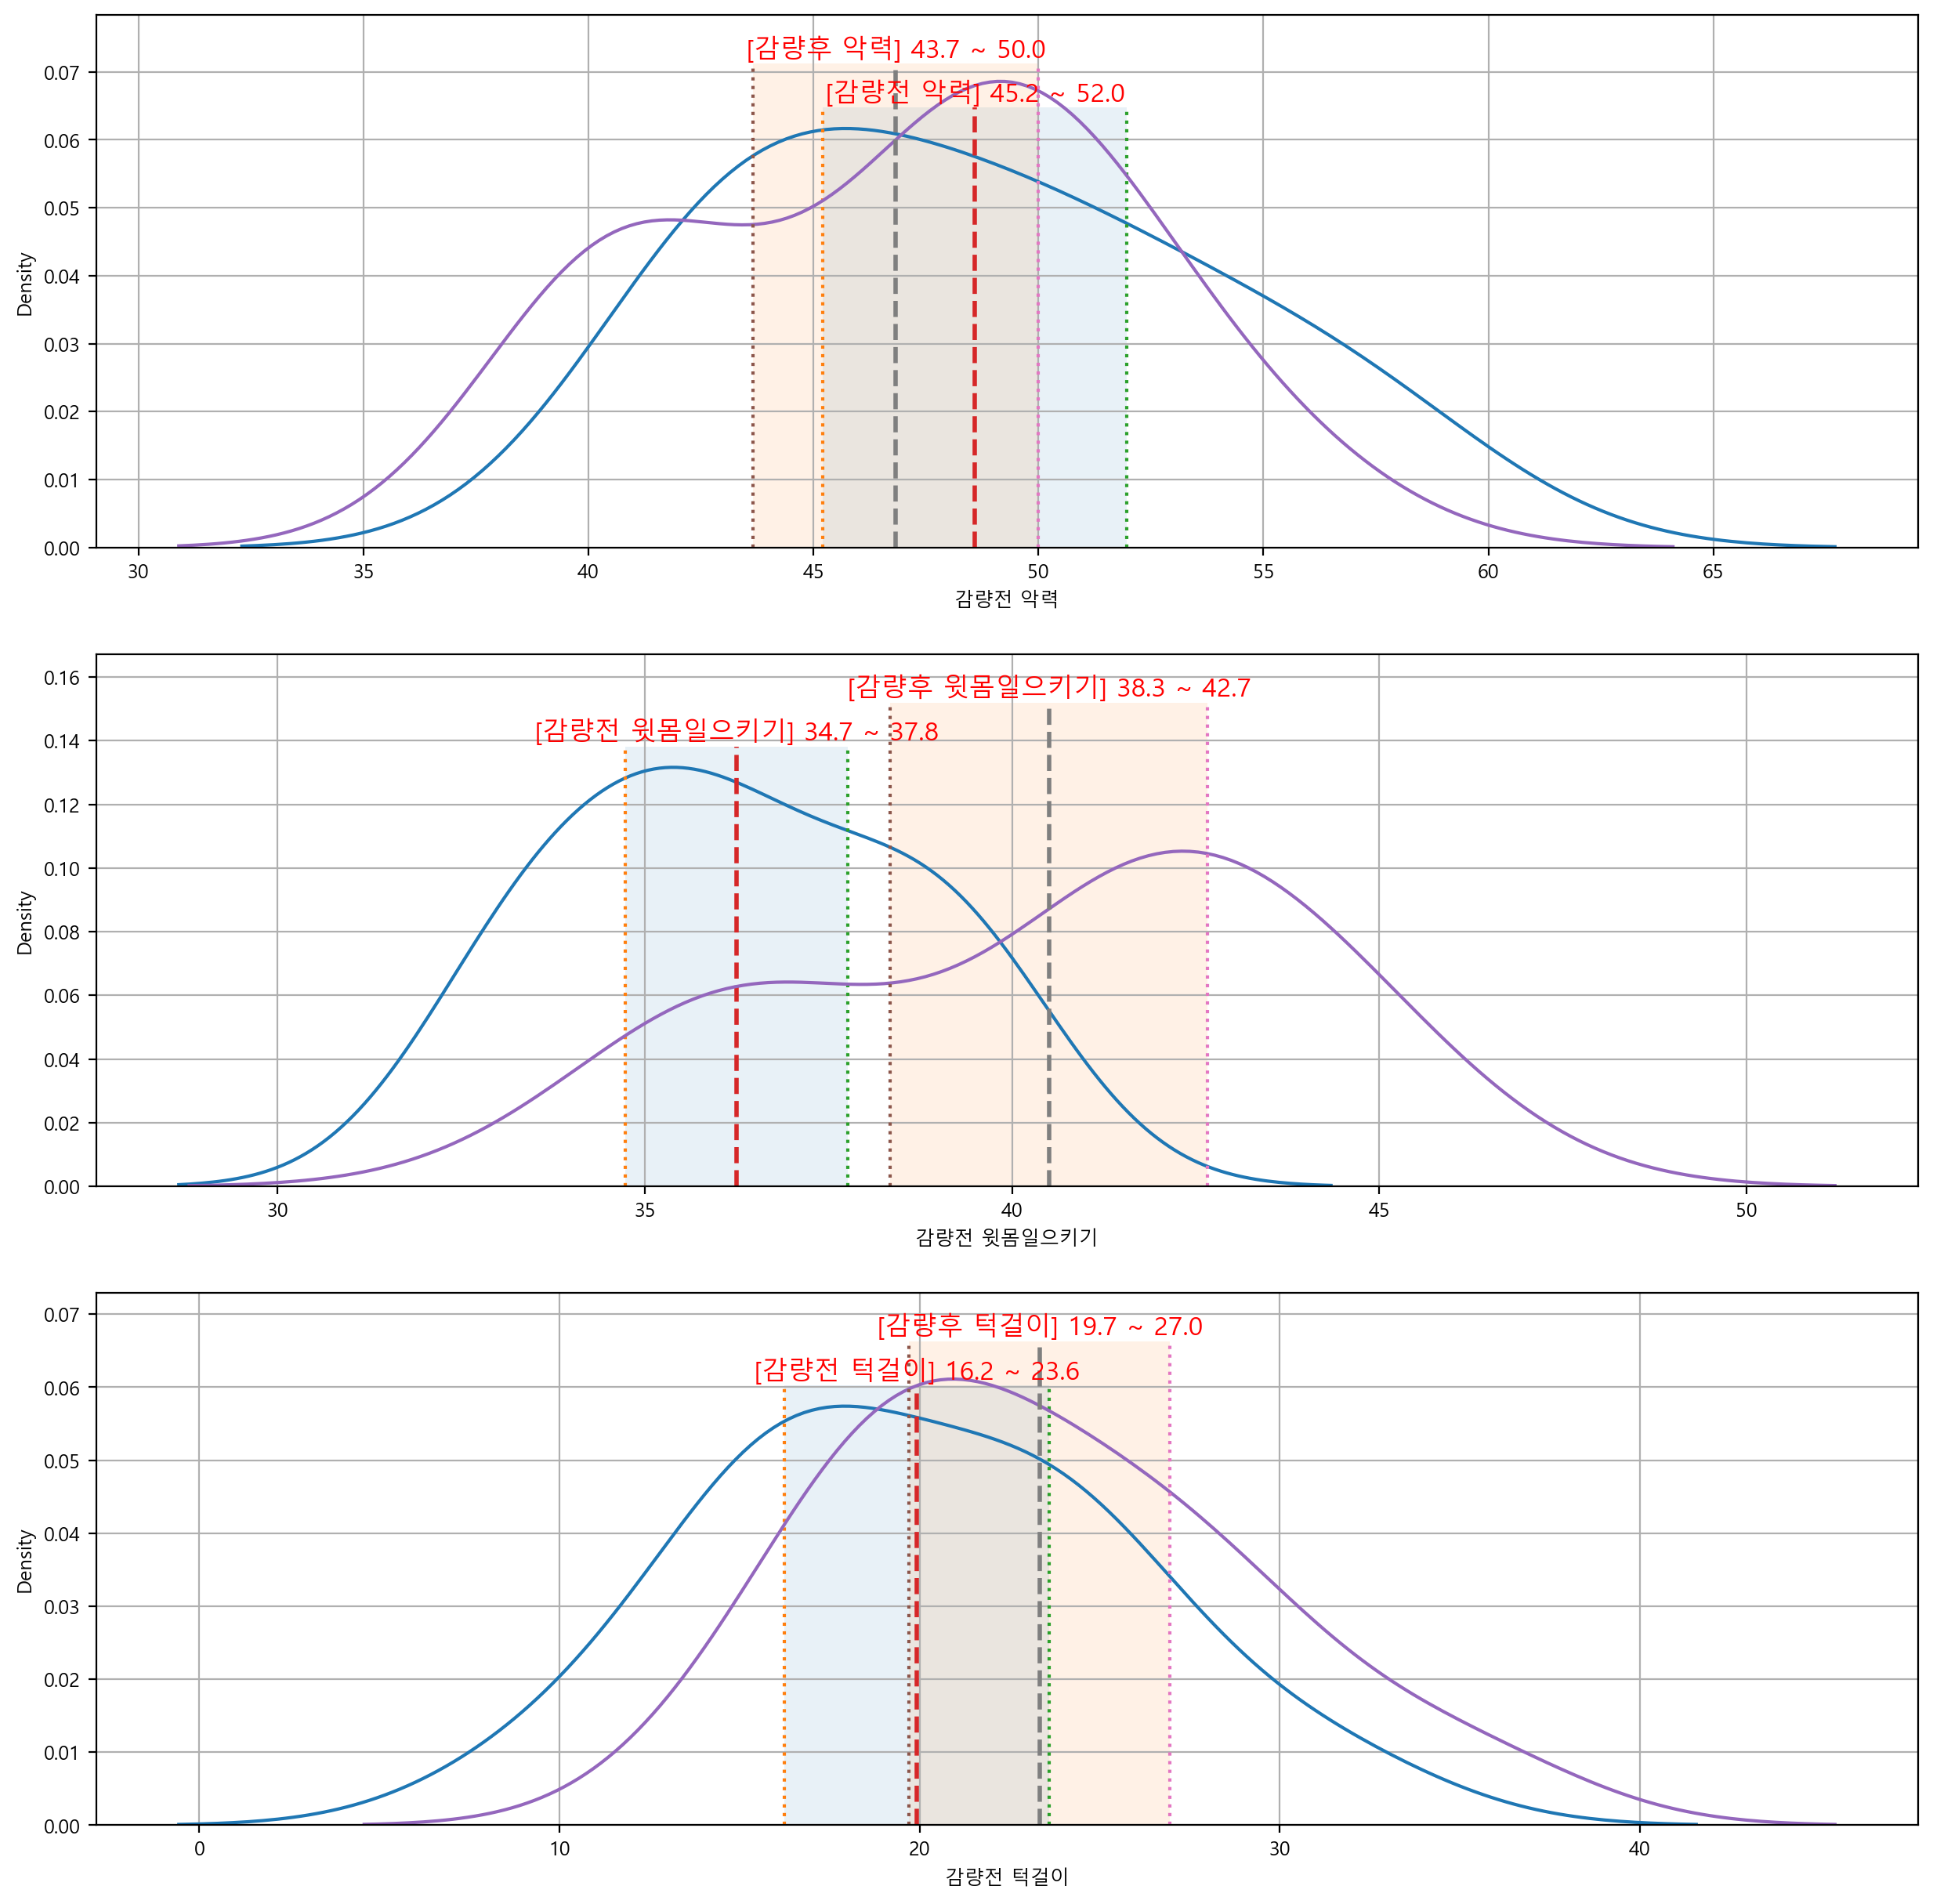

In [22]:
columns = origin.columns
size = len(columns)//2

fig, ax = plt.subplots(size, 1, figsize=(15, 15), dpi=200)

for i in range(size):
    #print(i)
    fields = columns[i*2:i*2+2]
    #print(fields)
    df = origin[fields]

    for c in df.columns:
        data = df[c]
        max = data.max()
        clevel = 0.95
        dof = len(data) - 1
        sample_mean = data.mean()
        sample_std = data.std(ddof=1)
        sample_std_error = sample_std / sqrt(len(data))

        # 신뢰구간
        cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

        sb.kdeplot(data=data, ax=ax[i])

        xmin, xmax, ymin, ymax = ax[i].axis()

        # 신뢰구간 그리기
        ax[i].plot([cmin, cmin], [ymin, ymax], linestyle=':')
        ax[i].plot([cmax, cmax], [ymin, ymax], linestyle=':')
        ax[i].fill_between([cmin, cmax], y1=ymin, y2=ymax, alpha=0.1)

        # 평균 그리기
        ax[i].plot([sample_mean, sample_mean], [ymin, ymax], linestyle='--', linewidth=2)

        ax[i].text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
                horizontalalignment="center",
                verticalalignment="bottom",
                fontdict={"size": 12, "color": "red"})

        ax[i].set_ylim([ymin, ymax*1.1])
        ax[i].grid(True)

plt.show()
plt.close()


### [3] 정규성, 등분산성 확인

In [23]:
columns = origin.columns
size = len(columns)//2

for i in range(size):
    fields = columns[i*2:i*2+2]
    #print(fields)

    print("-" * 30)
    data = origin[fields]
    normal_dist = True      # 정규성 만족 여부

    # 정규성 확인
    for c in data.columns:
        s, p = normaltest(data[c])
        print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))
        normal_dist = normal_dist and (p > 0.05)

    # 등분산성 확인
    fields = list(map(lambda x: data[x], data.columns))

    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*fields)
    else:
        n = "Levene"
        s, p = levene(*fields)

    print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

------------------------------
[감량전 악력] statistic: 1.146, p-value: 0.564, 정규성 충족 여부: True
[감량후 악력] statistic: 1.358, p-value: 0.507, 정규성 충족 여부: True
[Bartlett 검정] statistic: 0.043, p-value: 0.836, 등분산성 충족 여부: True
------------------------------
[감량전 윗몸일으키기] statistic: 1.363, p-value: 0.506, 정규성 충족 여부: True
[감량후 윗몸일으키기] statistic: 2.008, p-value: 0.366, 정규성 충족 여부: True
[Bartlett 검정] statistic: 1.310, p-value: 0.252, 등분산성 충족 여부: True
------------------------------
[감량전 턱걸이] statistic: 0.154, p-value: 0.926, 정규성 충족 여부: True
[감량후 턱걸이] statistic: 1.021, p-value: 0.600, 정규성 충족 여부: True
[Bartlett 검정] statistic: 0.002, p-value: 0.964, 등분산성 충족 여부: True


### [4] 대응표본 T검정

In [24]:
columns = origin.columns
size = len(columns)//2

for i in range(size):
    fields = columns[i*2:i*2+2]
    #print(fields)

    df = origin[fields]
    alternative = ["two-sided", "less", "greater"]
    result = []
    fmt = "μ({f0}) {0} μ({f1})"
    equal_var = True

    for a in alternative:
        if equal_var:
            s, p = ttest_rel(df[fields[0]], df[fields[1]], alternative=a)
        else:
            s, p = mannwhitneyu(df[fields[0]], df[fields[1]], alternative=a)

        itp = None

        if a == "two-sided":
            itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
        elif a == "less":
            itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
        else:
            itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

        result.append({
            "alternative": a,
            "statistic": s,
            "p-value": p,
            "H0": p > 0.05,
            "H1": p <= 0.05,
            "interpretation": itp
        })

    rdf = DataFrame(result)
    rdf.set_index("alternative", inplace=True)


    # headers='keys' --> 컬럼명을 표시함 (dataframe의 key(column name)를 column name(header)로 사용하라는 의미)
    # tablefmt='psql' --> 표 형식을 psql 형식으로 사용하라는 의미
    # showindex=True --> 인덱스를 표시하라는 의미
    print(tabulate(rdf, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

+---------------+-------------+-----------+-------+-------+----------------------------------+
| alternative   |   statistic |   p-value | H0    | H1    | interpretation                   |
|---------------+-------------+-----------+-------+-------+----------------------------------|
| two-sided     |     2.36541 | 0.0374544 | False | True  | μ(감량전 악력) != μ(감량후 악력) |
| less          |     2.36541 | 0.981273  | True  | False | μ(감량전 악력) >= μ(감량후 악력) |
| greater       |     2.36541 | 0.0187272 | False | True  | μ(감량전 악력) > μ(감량후 악력)  |
+---------------+-------------+-----------+-------+-------+----------------------------------+

+---------------+-------------+-------------+-------+-------+--------------------------------------------------+
| alternative   |   statistic |     p-value | H0    | H1    | interpretation                                   |
|---------------+-------------+-------------+-------+-------+--------------------------------------------------|
| two-sided     |    -7.1

### [5] 가설검정 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 악력 vs. 감량후 악력: t-test paired samples, P_val:3.745e-02 t=2.365e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 윗몸일으키기 vs. 감량후 윗몸일으키기: t-test paired samples, P_val:1.798e-05 t=-7.180e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 턱걸이 vs. 감량후 턱걸이: t-test paired samples, P_val:2.794e-05 t=-6.842e+00


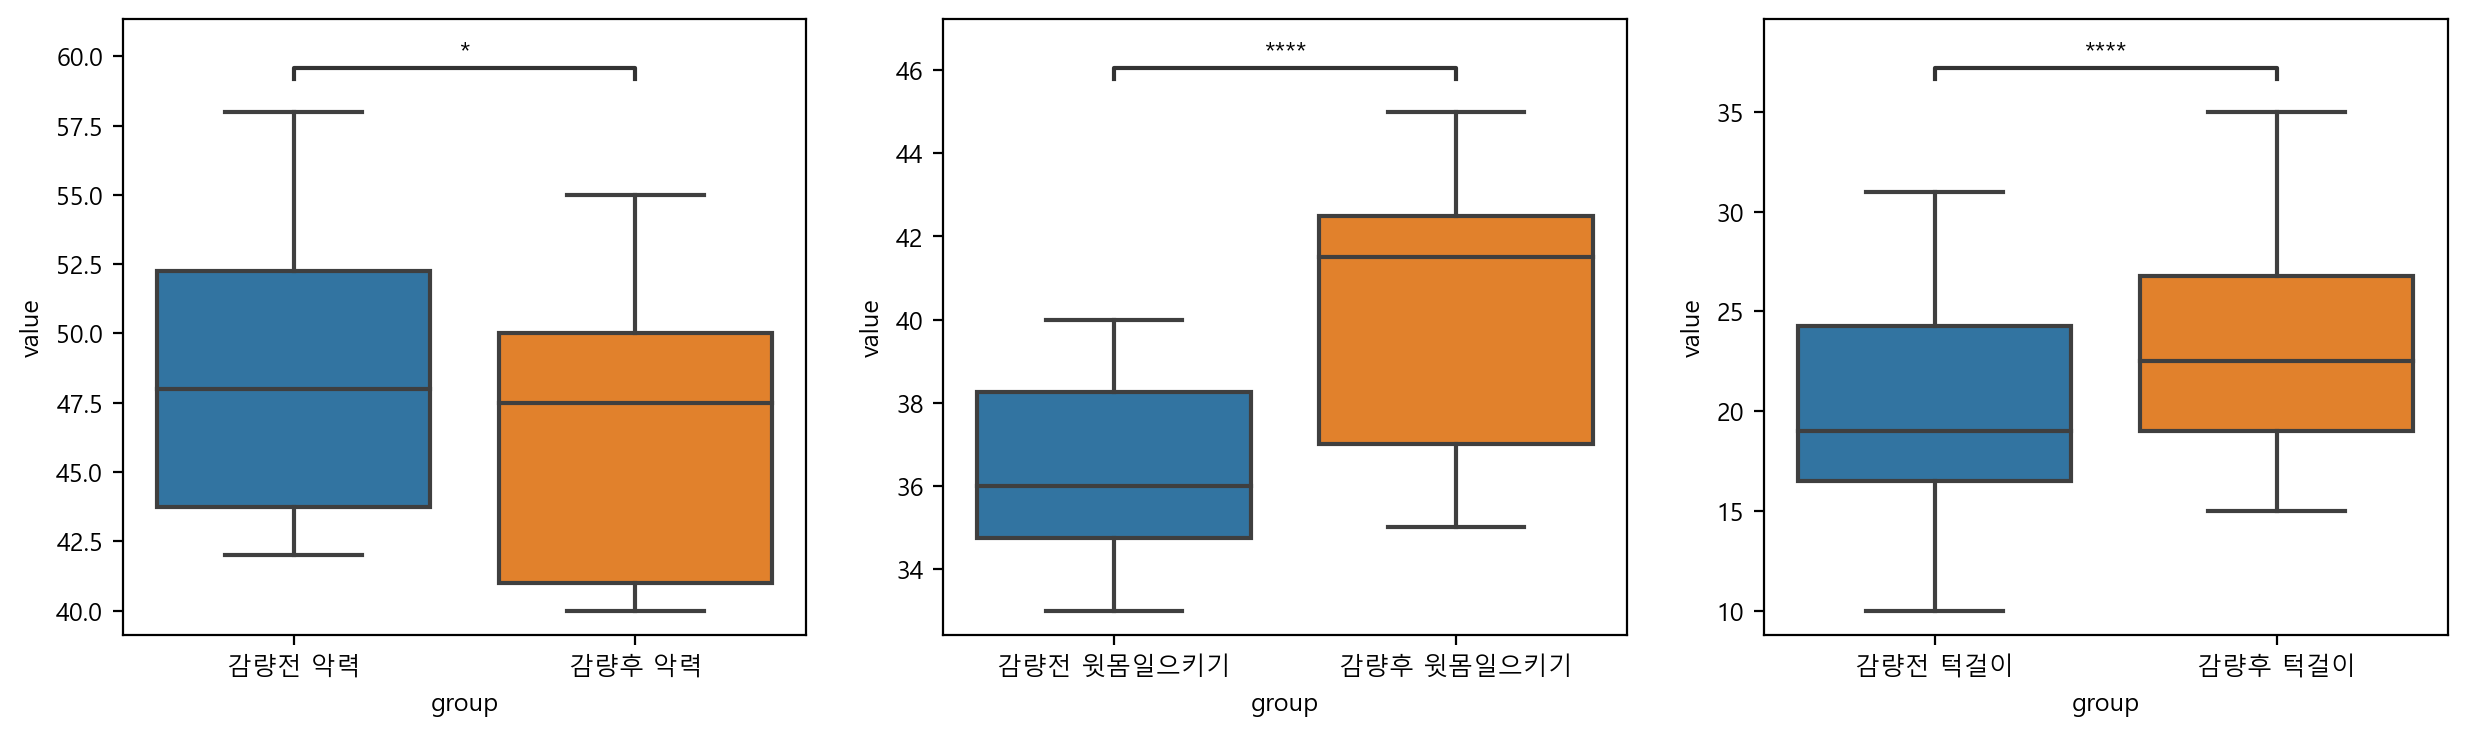

In [25]:
columns = origin.columns
size = len(columns)//2

fig, ax = plt.subplots(1, size, figsize=(15, 4), dpi=200)

for i in range(size):
    #print(i)
    fields = columns[i*2:i*2+2]
    #print(fields)
    df = melt(origin[fields], var_name="group", value_name="value")

    config = {
        "data": df,
        "x": "group",
        "y": "value",
        "pairs": [fields],
        # t-test_ind(독립,등분산), t-test_welch(독립,이분산)
        # t-test_paired(대응,등분산), Mann-Whitney(대응,이분산), Mann-Whitney-gt, Mann-Whitney-ls
        # Levene(분산분석), Wilcoxon, Kruskal
        "test": "t-test_paired",
        "text_format": "star", # full, simple, star
        "loc": "inside" # outside, inside
    }

    plot = sb.boxplot(data=config['data'], x=config['x'], y=config['y'], ax=ax[i])

    annotator = Annotator(plot, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
    annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
    annotator.apply_and_annotate()

plt.show()
plt.close()

## 문제 6

### [1] 데이터 가져오기

In [26]:
origin = read_excel("https://data.hossam.kr/mldata/commercial.xlsx")
origin.head()

,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166


### [2] 데이터 전처리

#### (1) 상/하반기 데이터 라벨링

In [27]:
df = origin.copy()
df['quarter'] = df['quarter'].map({1: 0, 2: 0, 3: 1, 4: 1})
df

,quarter,code,type,name,sales_amount,number_of_sales
0,0,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,0,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,0,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,0,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,0,3001495,관광특구,잠실 관광특구,231338386876,5995166
...,...,...,...,...,...,...
6217,1,3130323,전통시장,둔촌역전통시장,13523478306,535132
6218,1,3130324,전통시장,길동복조리시장,6236556030,330148
6219,1,3130325,전통시장,명일전통시장,3973269286,186049
6220,1,3130326,전통시장,고덕 골목형상점가,15013907999,755565


#### (2) 골목상권 데이터에 대한 처리

##### 데이터 추출

In [28]:
df2 = df[df['type'] == '골목상권'][['quarter', 'sales_amount']]

q0 = np.log(df2[df2['quarter'] == 0]['sales_amount'])
q1 = np.log(df2[df2['quarter'] == 1]['sales_amount'])

q0.shape, q1.shape

((2045,), (2048,))

##### 정규성, 등분산성 검정

In [29]:
normal_dist = True      # 정규성 만족 여부
data = [q0, q1]

# 정규성 확인
for c in data:
    s, p = normaltest(c)
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format("골목상권", s, p, p > 0.05))
    normal_dist = normal_dist and (p > 0.05)


# 등분산성 확인
if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*data)
else:
    n = "Levene"
    s, p = levene(*data)

equal_var = p > 0.05
print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, equal_var))

[골목상권] statistic: 400.831, p-value: 0.000, 정규성 충족 여부: False
[골목상권] statistic: 460.405, p-value: 0.000, 정규성 충족 여부: False
[Levene 검정] statistic: 0.167, p-value: 0.683, 등분산성 충족 여부: True


##### 독립표본 T검정

In [30]:
alternative = ["two-sided", "less", "greater"]
result = []
fields = ['상반기', '하반기']
fmt = "μ({f0}) {0} μ({f1})"

for a in alternative:
    s, p = ttest_ind(data[0], data[1], alternative=a, equal_var=equal_var)

    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
    elif a == "less":
        itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
    else:
        itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

    result.append({
        "alternative": a,
        "statistic": round(s, 3),
        "p-value": round(p, 3),
        "H0": p > 0.05,
        "H1": p <= 0.05,
        "interpretation": itp
    })

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-2.439,0.015,False,True,μ(상반기) != μ(하반기)
less,-2.439,0.007,False,True,μ(상반기) < μ(하반기)
greater,-2.439,0.993,True,False,μ(상반기) <= μ(하반기)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test independent samples, P_val:1.478e-02 t=-2.439e+00


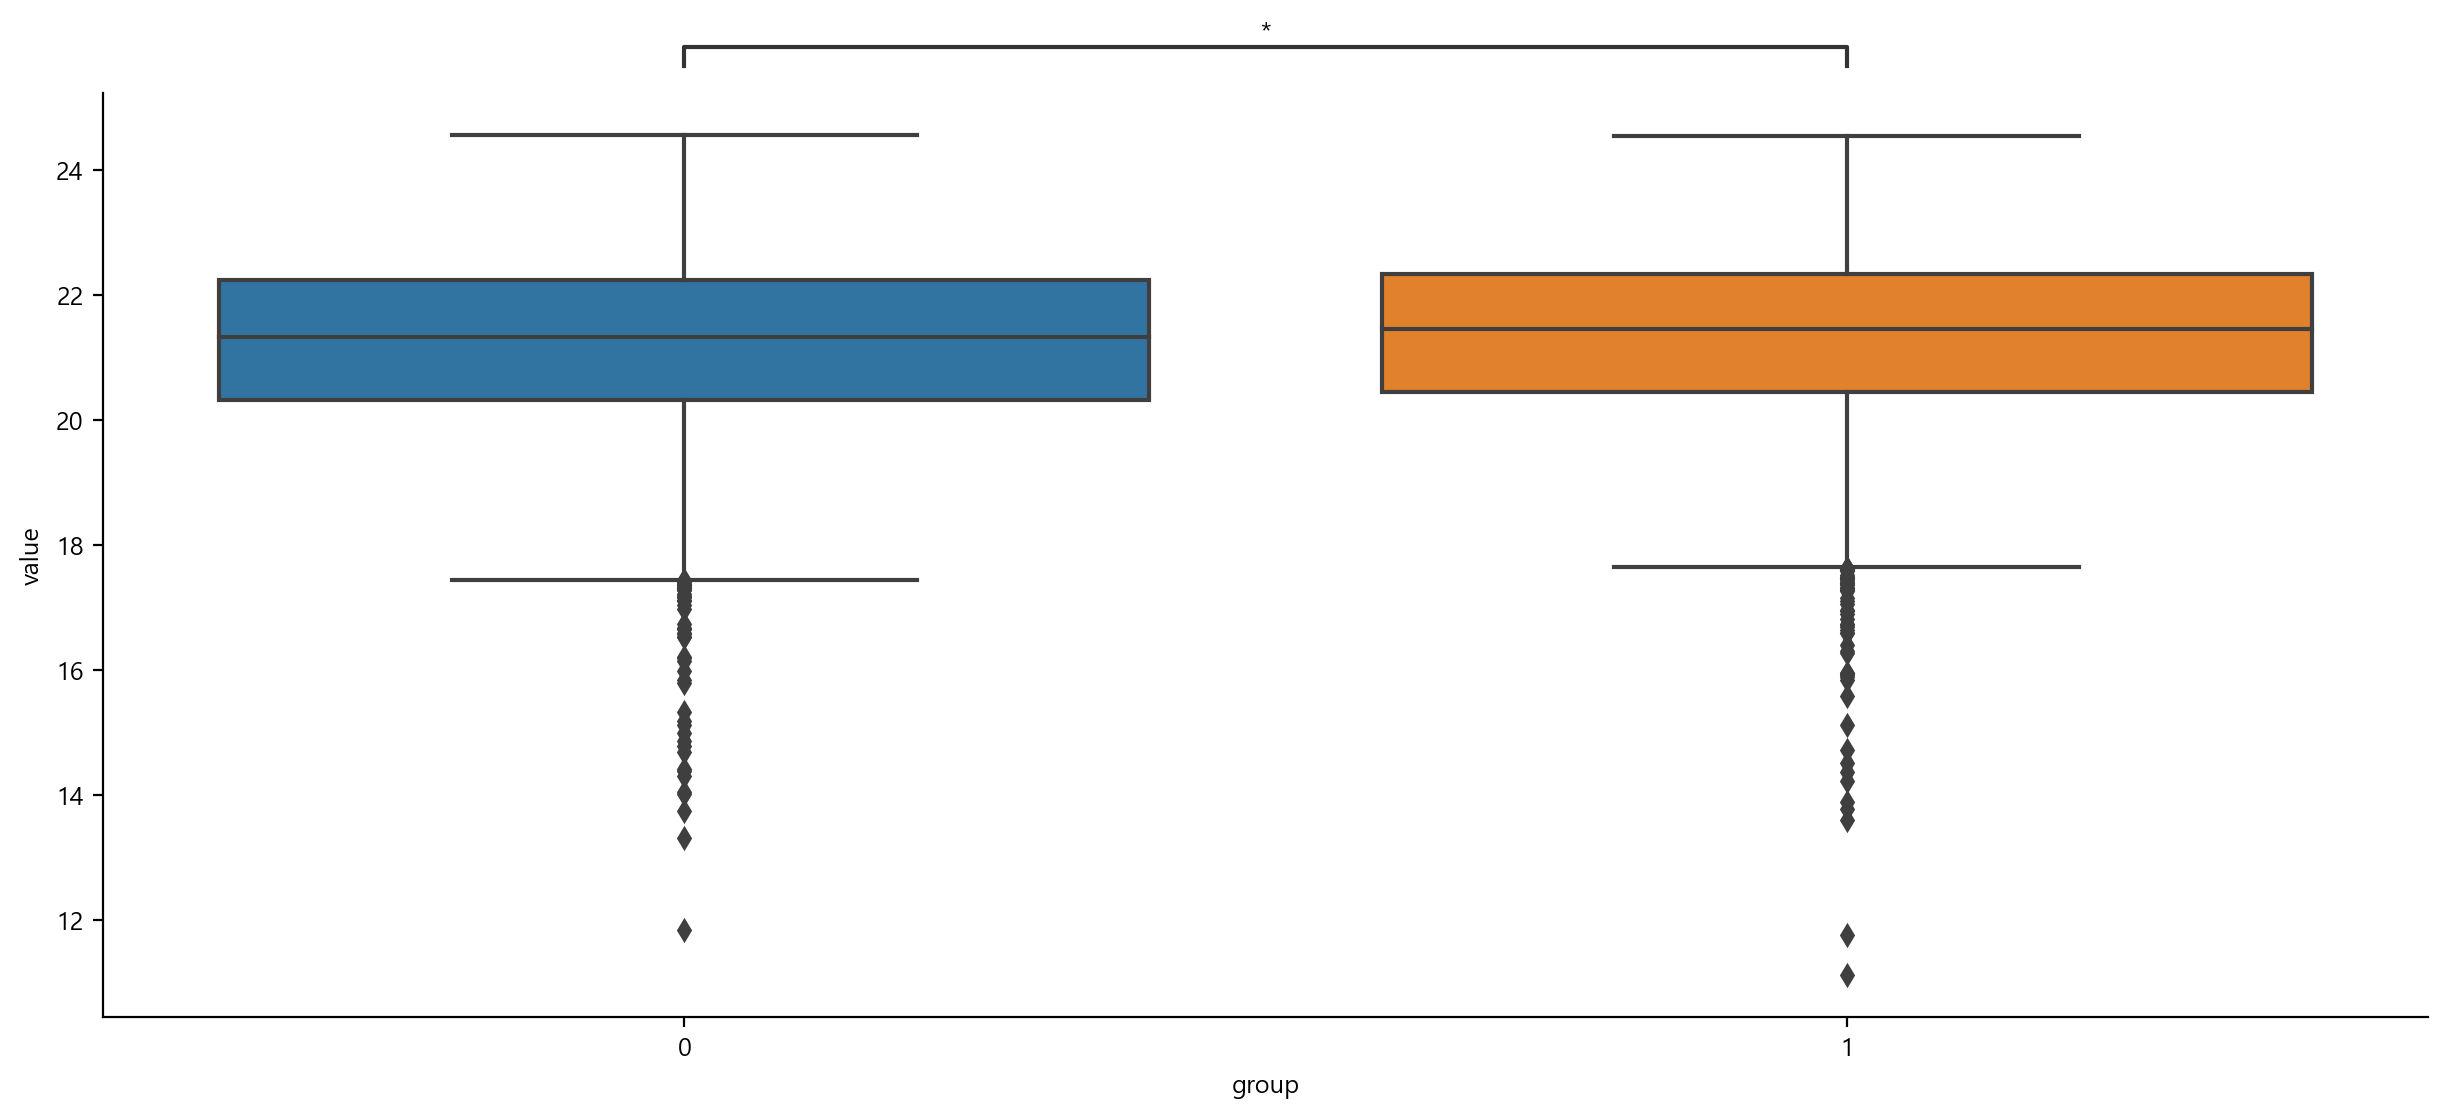

In [31]:
tmp_df = melt(DataFrame({0: q0, 1: q1}), var_name="group", value_name="value")

config = {
    "data": tmp_df,
    "x": "group",
    "y": "value",
    "pairs": [(0, 1)],
    # t-test_ind(독립,등분산), t-test_welch(독립,이분산)
    # t-test_paired(대응,등분산), Mann-Whitney(대응,이분산), Mann-Whitney-gt, Mann-Whitney-ls
    # Levene(분산분석), Wilcoxon, Kruskal
    "test": "t-test_ind",
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

### (3) 절차가 확인되었으니 일괄 처리 하자

골목상권
------------------------------
[골목상권] statistic: 400.831, p-value: 0.000, 정규성 충족 여부: False
[골목상권] statistic: 460.405, p-value: 0.000, 정규성 충족 여부: False
[Levene 검정] statistic: 0.167, p-value: 0.683, 등분산성 충족 여부: True
+---------------+-------------+-----------+-------+-------+------------------------+
| alternative   |   statistic |   p-value | H0    | H1    | interpretation         |
|---------------+-------------+-----------+-------+-------+------------------------|
| two-sided     |      -2.439 |     0.015 | False | True  | μ(상반기) != μ(하반기) |
| less          |      -2.439 |     0.007 | False | True  | μ(상반기) < μ(하반기)  |
| greater       |      -2.439 |     0.993 | True  | False | μ(상반기) <= μ(하반기) |
+---------------+-------------+-----------+-------+-------+------------------------+

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-

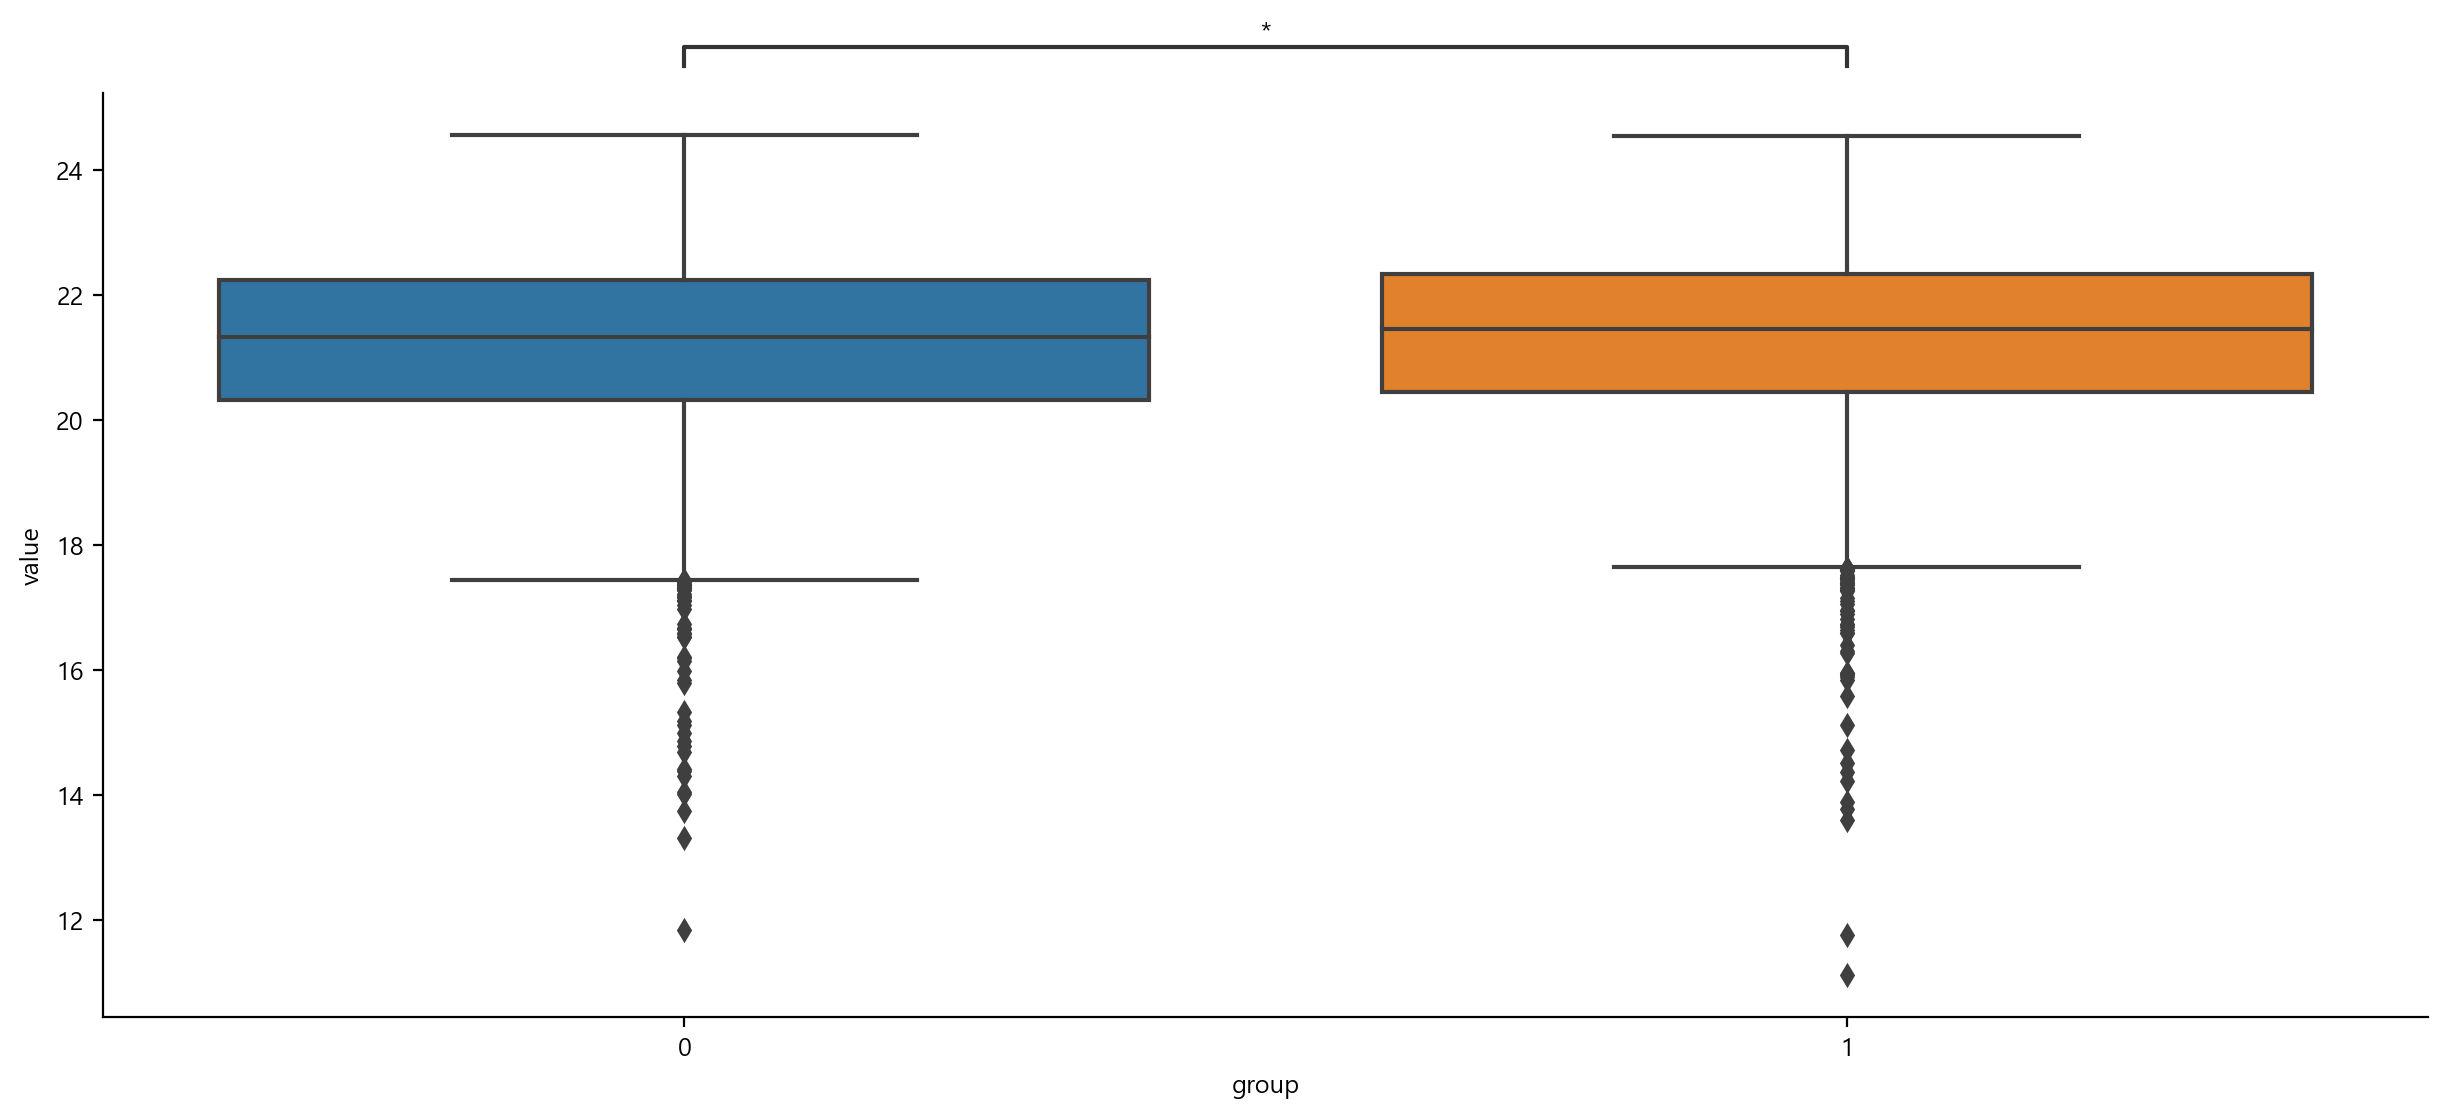

전통시장
------------------------------
[전통시장] statistic: 57.261, p-value: 0.000, 정규성 충족 여부: False
[전통시장] statistic: 44.296, p-value: 0.000, 정규성 충족 여부: False
[Levene 검정] statistic: 0.221, p-value: 0.638, 등분산성 충족 여부: True
+---------------+-------------+-----------+------+-------+------------------------+
| alternative   |   statistic |   p-value | H0   | H1    | interpretation         |
|---------------+-------------+-----------+------+-------+------------------------|
| two-sided     |      -1.301 |     0.193 | True | False | μ(상반기) == μ(하반기) |
| less          |      -1.301 |     0.097 | True | False | μ(상반기) >= μ(하반기) |
| greater       |      -1.301 |     0.903 | True | False | μ(상반기) <= μ(하반기) |
+---------------+-------------+-----------+------+-------+------------------------+

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test inde

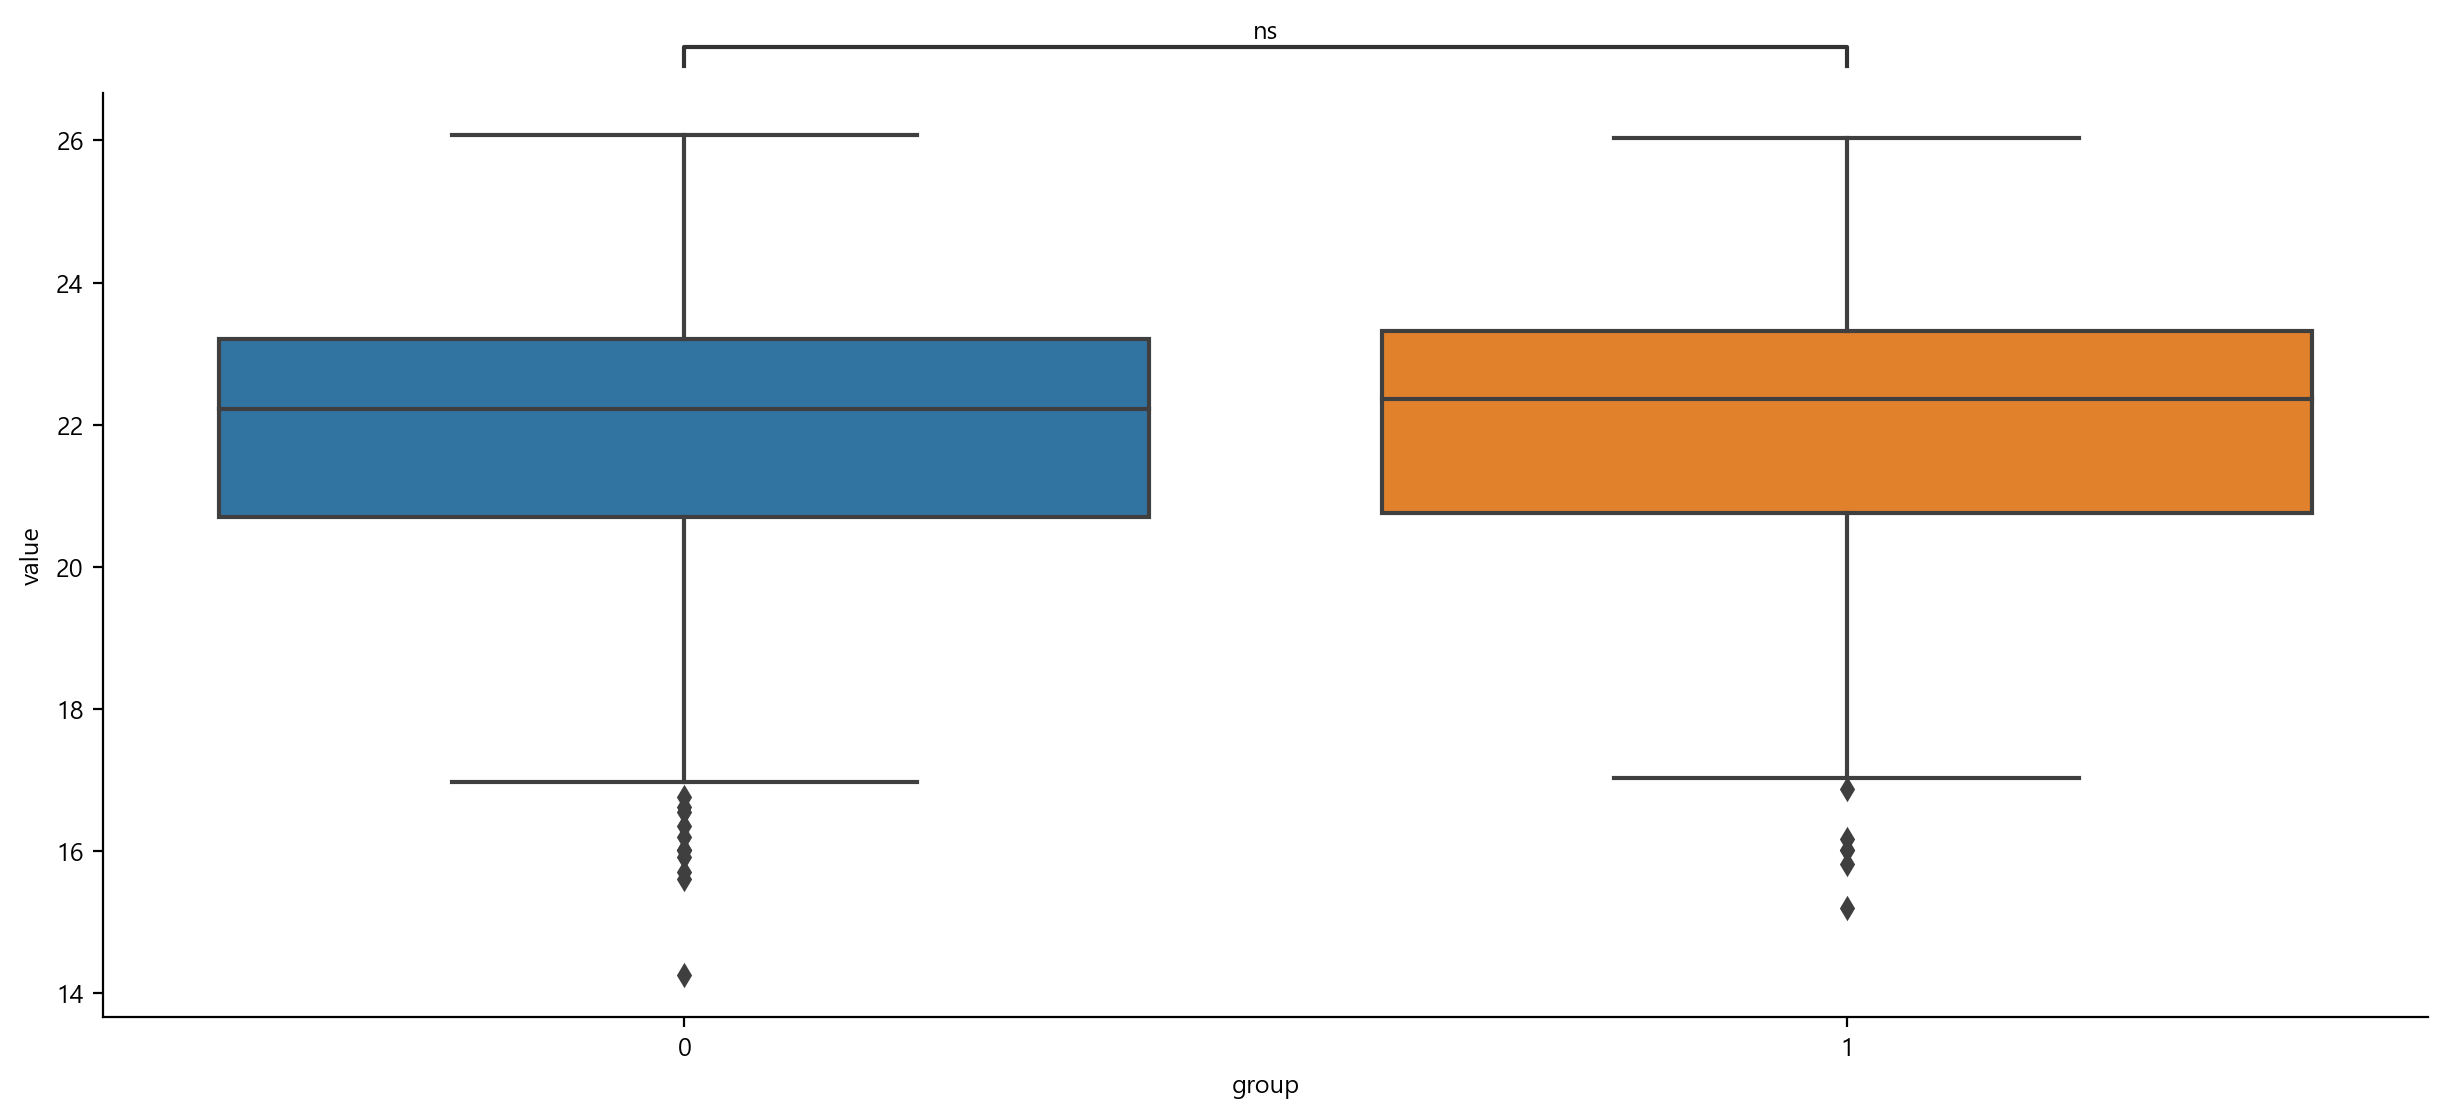

발달상권
------------------------------
[발달상권] statistic: 43.672, p-value: 0.000, 정규성 충족 여부: False
[발달상권] statistic: 45.643, p-value: 0.000, 정규성 충족 여부: False
[Levene 검정] statistic: 0.016, p-value: 0.900, 등분산성 충족 여부: True
+---------------+-------------+-----------+------+-------+------------------------+
| alternative   |   statistic |   p-value | H0   | H1    | interpretation         |
|---------------+-------------+-----------+------+-------+------------------------|
| two-sided     |      -1.591 |     0.112 | True | False | μ(상반기) == μ(하반기) |
| less          |      -1.591 |     0.056 | True | False | μ(상반기) >= μ(하반기) |
| greater       |      -1.591 |     0.944 | True | False | μ(상반기) <= μ(하반기) |
+---------------+-------------+-----------+------+-------+------------------------+

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test inde

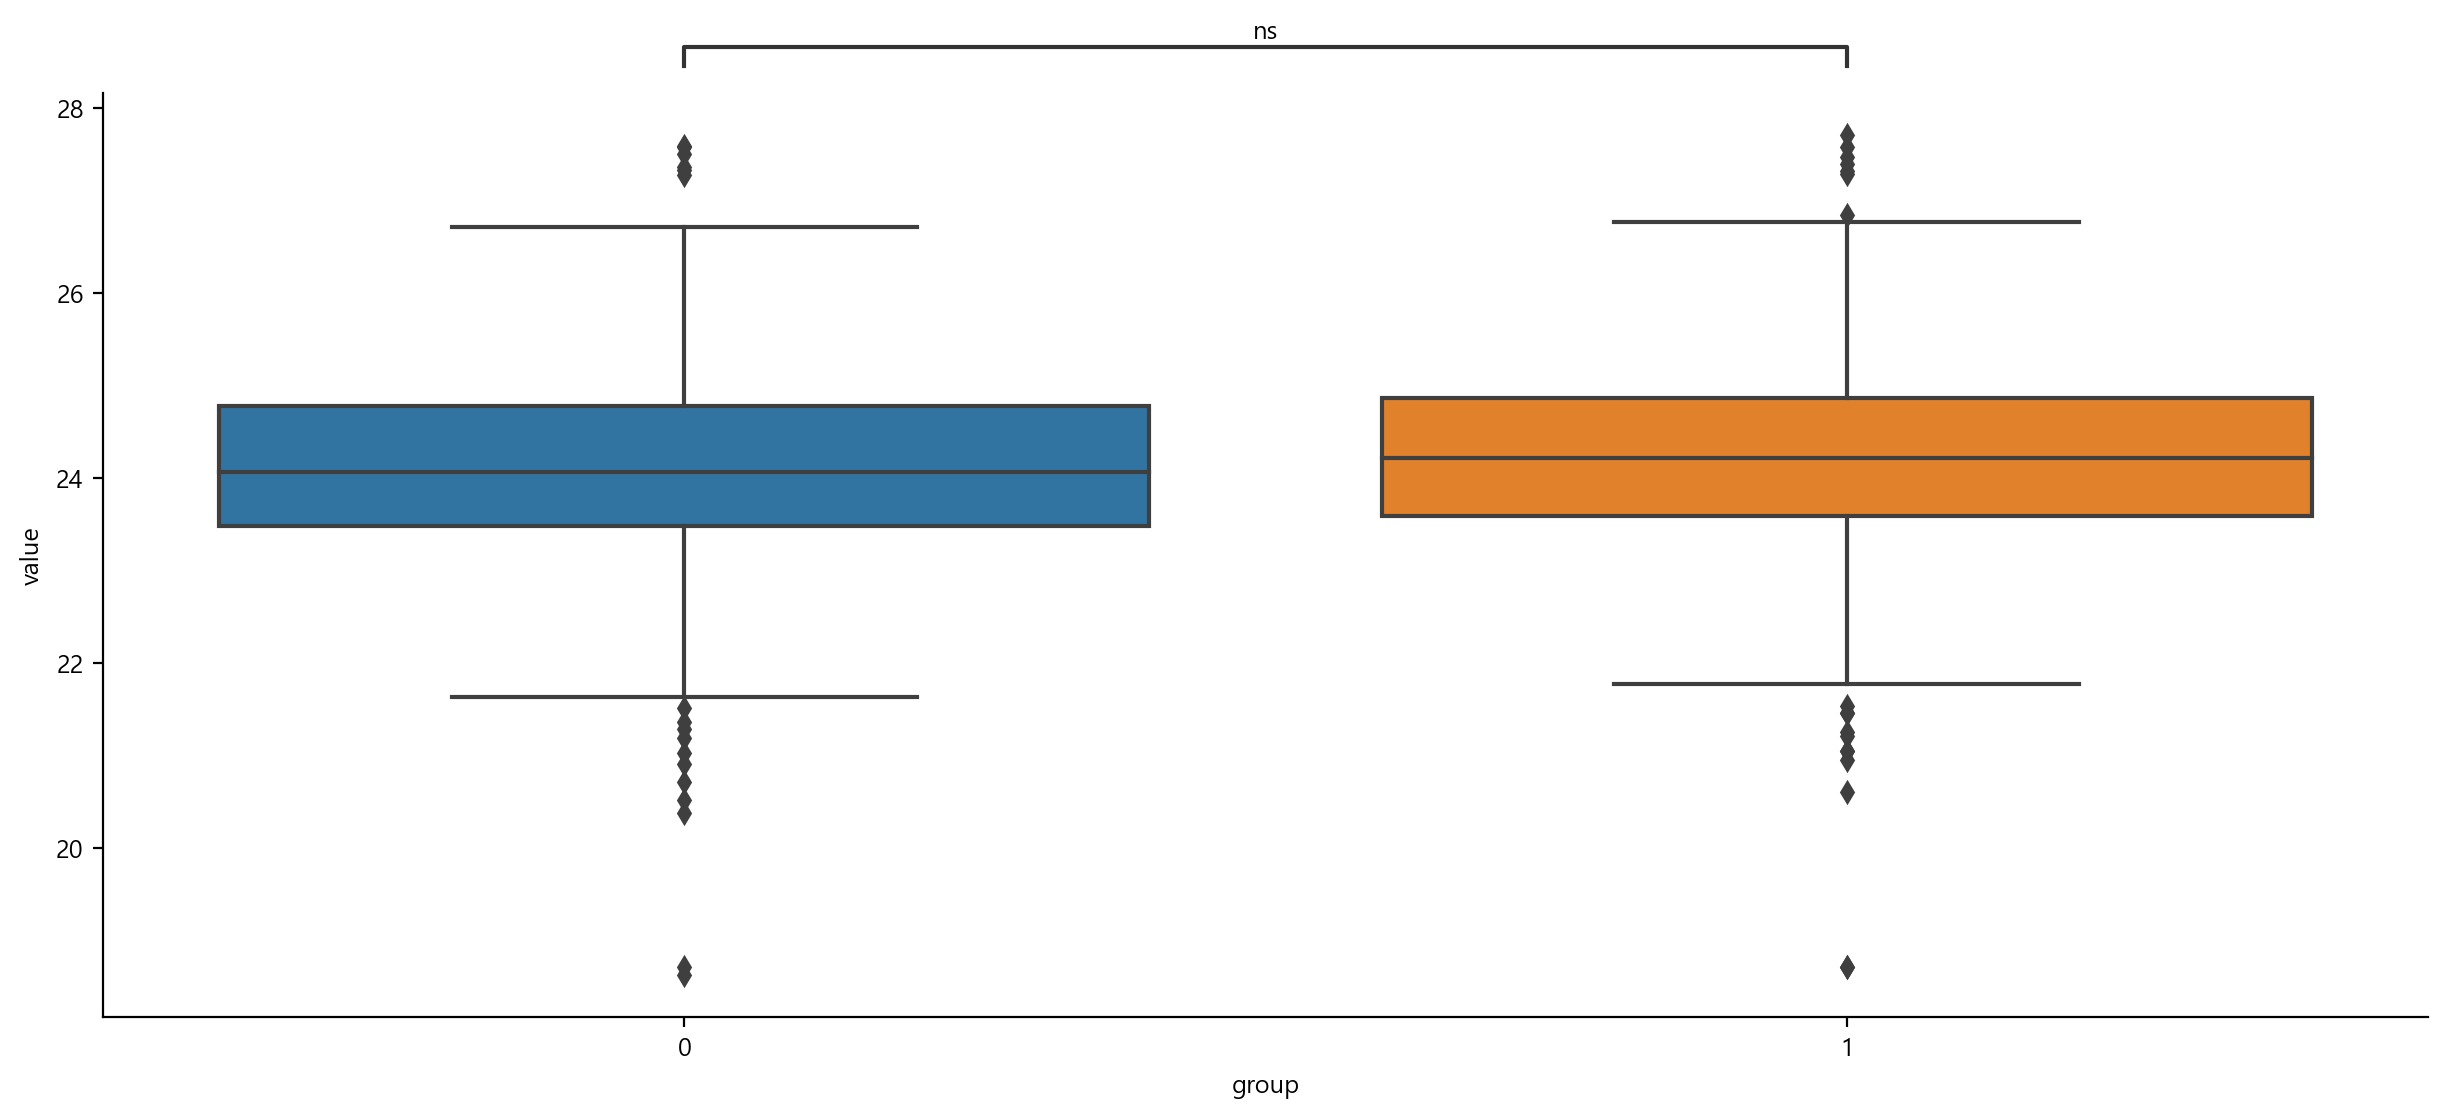

관광특구
------------------------------
[관광특구] statistic: 1.781, p-value: 0.411, 정규성 충족 여부: True
[관광특구] statistic: 2.880, p-value: 0.237, 정규성 충족 여부: True
[Bartlett 검정] statistic: 0.065, p-value: 0.799, 등분산성 충족 여부: True
+---------------+-------------+-----------+------+-------+------------------------+
| alternative   |   statistic |   p-value | H0   | H1    | interpretation         |
|---------------+-------------+-----------+------+-------+------------------------|
| two-sided     |      -0.879 |     0.389 | True | False | μ(상반기) == μ(하반기) |
| less          |      -0.879 |     0.195 | True | False | μ(상반기) >= μ(하반기) |
| greater       |      -0.879 |     0.805 | True | False | μ(상반기) <= μ(하반기) |
+---------------+-------------+-----------+------+-------+------------------------+

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: t-test indepe

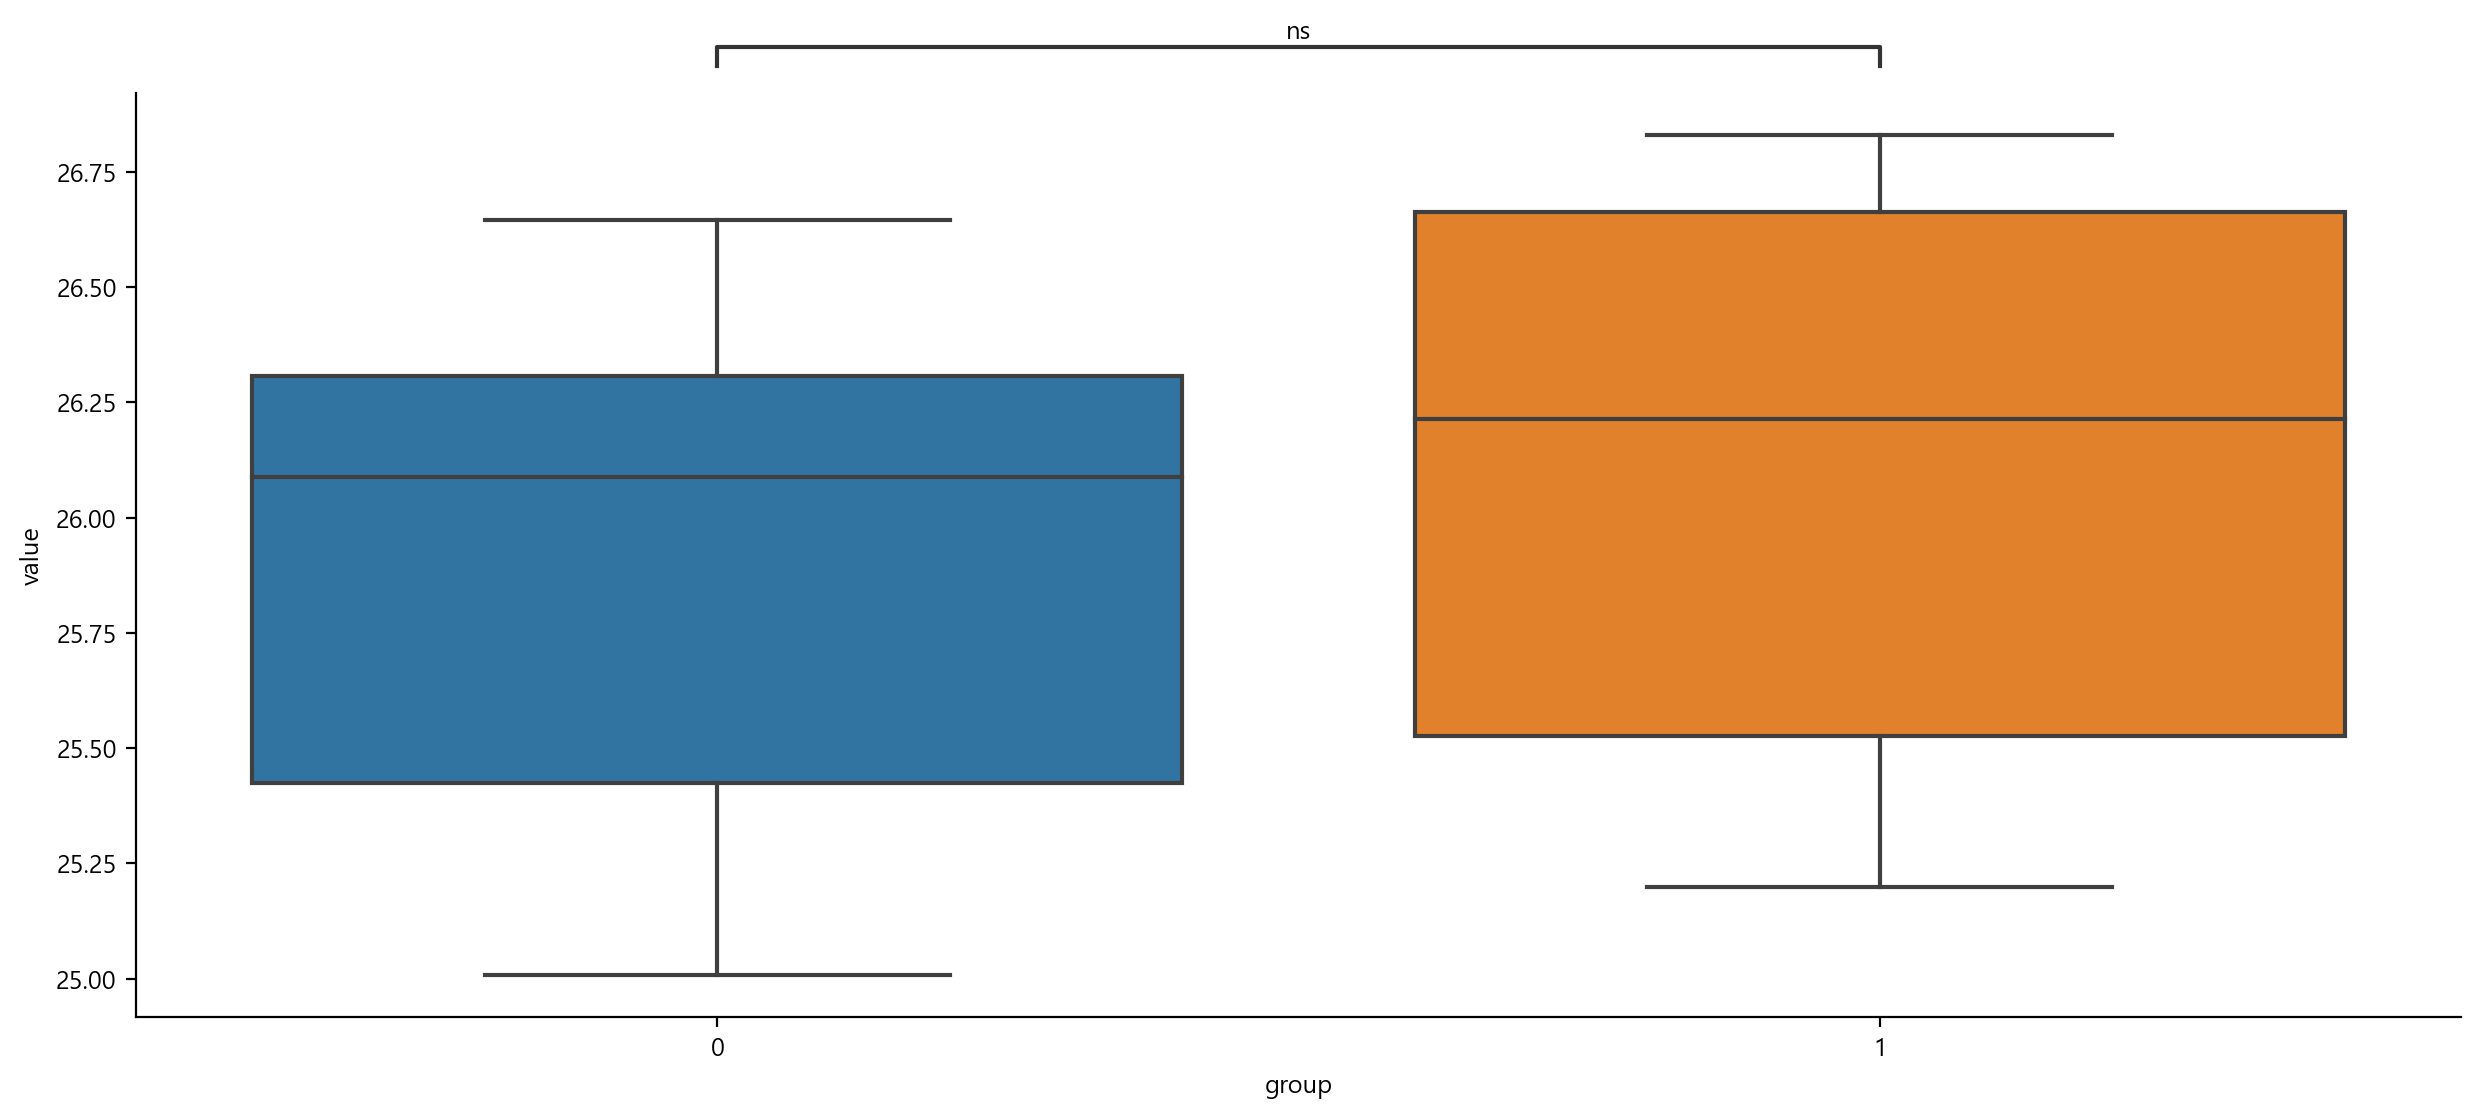

In [32]:
type = ['골목상권', '전통시장', '발달상권', '관광특구']

for t in type:
    print(t)
    print("-" * 30)
    df2 = df[df['type'] == t][['quarter', 'sales_amount']]
    q0 = np.log(df2[df2['quarter'] == 0]['sales_amount'])
    q1 = np.log(df2[df2['quarter'] == 1]['sales_amount'])

    normal_dist = True      # 정규성 만족 여부
    data = [q0, q1]

    # 정규성 확인
    for c in data:
        s, p = normaltest(c)
        print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(t, s, p, p > 0.05))
        normal_dist = normal_dist and (p > 0.05)


    # 등분산성 확인
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data)
    else:
        n = "Levene"
        s, p = levene(*data)

    equal_var = p > 0.05
    print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, equal_var))


    alternative = ["two-sided", "less", "greater"]
    result = []
    fields = ['상반기', '하반기']
    fmt = "μ({f0}) {0} μ({f1})"

    for a in alternative:
        s, p = ttest_ind(data[0], data[1], alternative=a, equal_var=equal_var)

        itp = None

        if a == "two-sided":
            itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
        elif a == "less":
            itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
        else:
            itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

        result.append({
            "alternative": a,
            "statistic": round(s, 3),
            "p-value": round(p, 3),
            "H0": p > 0.05,
            "H1": p <= 0.05,
            "interpretation": itp
        })

    rdf = DataFrame(result)
    rdf.set_index("alternative", inplace=True)
    print(tabulate(rdf, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

    tmp_df = melt(DataFrame({0: q0, 1: q1}), var_name="group", value_name="value")

    config = {
        "data": tmp_df,
        "x": "group",
        "y": "value",
        "pairs": [(0, 1)],
        # t-test_ind(독립,등분산), t-test_welch(독립,이분산)
        # t-test_paired(대응,등분산), Mann-Whitney(대응,이분산), Mann-Whitney-gt, Mann-Whitney-ls
        # Levene(분산분석), Wilcoxon, Kruskal
        "test": "t-test_ind" if equal_var else "t-test_welch",
        "text_format": "star", # full, simple, star
        "loc": "outside" # outside, inside
    }

    plt.figure()
    ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])

    annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
    annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
    annotator.apply_and_annotate()

    sb.despine()
    plt.show()
    plt.close()

## 문제 7

### [1] 데이터 가져오기

In [33]:
origin = read_excel("https://data.hossam.kr/mldata/cookie_cats.xlsx", index_col='userid')
origin.head()

,version,sum_gamerounds
userid,,
116,A,3
337,A,38
377,B,165
483,B,1
488,B,179


### [2] 데이터 정제 없이 분석

#### (1) 데이터 전처리

In [34]:
A = origin[origin['version'] == 'A']['sum_gamerounds'].sort_values().reset_index(drop=True)
B = origin[origin['version'] == 'B']['sum_gamerounds'].sort_values().reset_index(drop=True)
df = DataFrame({'A': A, 'B': B})
df

,A,B
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
45484,NaN,2015
45485,NaN,2063
45486,NaN,2124
45487,NaN,2294


#### (2) 정규성 및 등분산성 검정

In [35]:
normal_dist = True      # 정규성 만족 여부
data = df.copy()    # 원본 데이터 복사

# 정규성 확인
for c in data.columns:
    s, p = normaltest(data[c].dropna())
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))
    normal_dist = normal_dist and (p > 0.05)


# 등분산성 확인
fields = list(map(lambda x: data[x].dropna(), data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

[A] statistic: 206386.768, p-value: 0.000, 정규성 충족 여부: False
[B] statistic: 52497.052, p-value: 0.000, 정규성 충족 여부: False
[Levene 검정] statistic: 0.529, p-value: 0.467, 등분산성 충족 여부: True


#### (3) 독립표본 T검정

In [36]:
alternative = ["two-sided", "less", "greater"]
result = []
fields = ['A', 'B']
fmt = "μ({f0}) {0} μ({f1})"
equal_var = True

for a in alternative:
    s, p = ttest_ind(df[fields[0]].dropna(), df[fields[1]].dropna(), alternative=a, equal_var=equal_var)

    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
    elif a == "less":
        itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
    else:
        itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

    result.append({
        "alternative": a,
        "statistic": round(s, 3),
        "p-value": round(p, 3),
        "H0": p > 0.05,
        "H1": p <= 0.05,
        "interpretation": itp
    })

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,0.891,0.373,True,False,μ(A) == μ(B)
less,0.891,0.814,True,False,μ(A) >= μ(B)
greater,0.891,0.186,True,False,μ(A) <= μ(B)


> A버전과 B버전간의 평균 플레이 시간이 동일한 것으로 나타난다. 뭔가 이상하다...

### [3] 데이터 정제 후 분석하기

이상치에 해당하는 데이터는 일부 해비유저에 해당하므로 일반 유저들간의 플레이시간을 비교하기 위해 이상치를 제거해 보자.

#### (1) A 버전에 대한 이상치 제거

In [37]:
A = origin[origin['version'] == 'A']['sum_gamerounds'].sort_values()
Q1 = A.quantile(0.25)
Q3 = A.quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5
print("상한 극단치 경계:", outline_max)
print("하한 극단치 경계:", outline_min)

A1 = A[(A >= outline_min) & (A <= outline_max)].reset_index(drop=True)
A1

상한 극단치 경계: 117.5
하한 극단치 경계: -62.5


0          0
1          0
2          0
3          0
4          0
        ... 
39488    117
39489    117
39490    117
39491    117
39492    117
Name: sum_gamerounds, Length: 39493, dtype: int64

#### (2) B 버전에 대한 이상치 제거

In [38]:
B = origin[origin['version'] == 'B']['sum_gamerounds'].sort_values()
Q1 = B.quantile(0.25)
Q3 = B.quantile(0.75)
iqr = Q3 - Q1
outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5
print("상한 극단치 경계:", outline_max)
print("하한 극단치 경계:", outline_min)

B1 = B[(B >= outline_min) & (B <= outline_max)].reset_index(drop=True)
B1

상한 극단치 경계: 122.5
하한 극단치 경계: -65.5


0          0
1          0
2          0
3          0
4          0
        ... 
40466    122
40467    122
40468    122
40469    122
40470    122
Name: sum_gamerounds, Length: 40471, dtype: int64

#### (3) 데이터 프레임으로 묶기

In [39]:
df = DataFrame({'A': A1, 'B': B1})
df

,A,B
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
40466,NaN,122
40467,NaN,122
40468,NaN,122
40469,NaN,122


> 두 요인간의 표본수가 서로 다르다.

#### (4) 정규성, 등분산성 검정

In [40]:
normal_dist = True      # 정규성 만족 여부
data = df.copy()    # 원본 데이터 복사

# 정규성 확인
for c in data.columns:
    s, p = normaltest(data[c].dropna())
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))
    normal_dist = normal_dist and (p > 0.05)

# 등분산성 확인
fields = list(map(lambda x: data[x].dropna(), data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("[{0} 검정] statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

[A] statistic: 9923.302, p-value: 0.000, 정규성 충족 여부: False
[B] statistic: 10414.180, p-value: 0.000, 정규성 충족 여부: False
[Levene 검정] statistic: 24.123, p-value: 0.000, 등분산성 충족 여부: False


#### (5) 독립표본 T검정

요인간의 표본수가 서로 다른 경우 대응표본 T검정은 성립되지 않는다.

In [41]:
data = df.copy()    # 원본 데이터 복사
alternative = ["two-sided", "less", "greater"]
result = []
fields = ['A', 'B']
fmt = "μ({f0}) {0} μ({f1})"
equal_var = False

for a in alternative:
    s, p = ttest_ind(data[fields[0]].dropna(), data[fields[1]].dropna(), alternative=a, equal_var=equal_var)

    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "!=", f0=fields[0], f1=fields[1])
    elif a == "less":
        itp = fmt.format(">=" if p > 0.05 else "<", f0=fields[0], f1=fields[1])
    else:
        itp = fmt.format("<=" if p > 0.05 else ">", f0=fields[0], f1=fields[1])

    result.append({
        "alternative": a,
        "statistic": round(s, 3),
        "p-value": round(p, 3),
        "H0": p > 0.05,
        "H1": p <= 0.05,
        "interpretation": itp
    })

rdf = DataFrame(result)
rdf.set_index("alternative", inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-3.353,0.001,False,True,μ(A) != μ(B)
less,-3.353,0.000,False,True,μ(A) < μ(B)
greater,-3.353,1.000,True,False,μ(A) <= μ(B)


> 해비유저에 해당하는 이상치를 제거하고 일반 유저들을 대상으로 대응표본 T검정을 시행한 결과 B버전에서 유저들의 평균 플레이 시간이 A버전에서의 평균 플레이 시간보다 더 긴 것으로 나타났다.

#### (6) 분석결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: Welch's t-test independent samples, P_val:7.986e-04 t=-3.353e+00


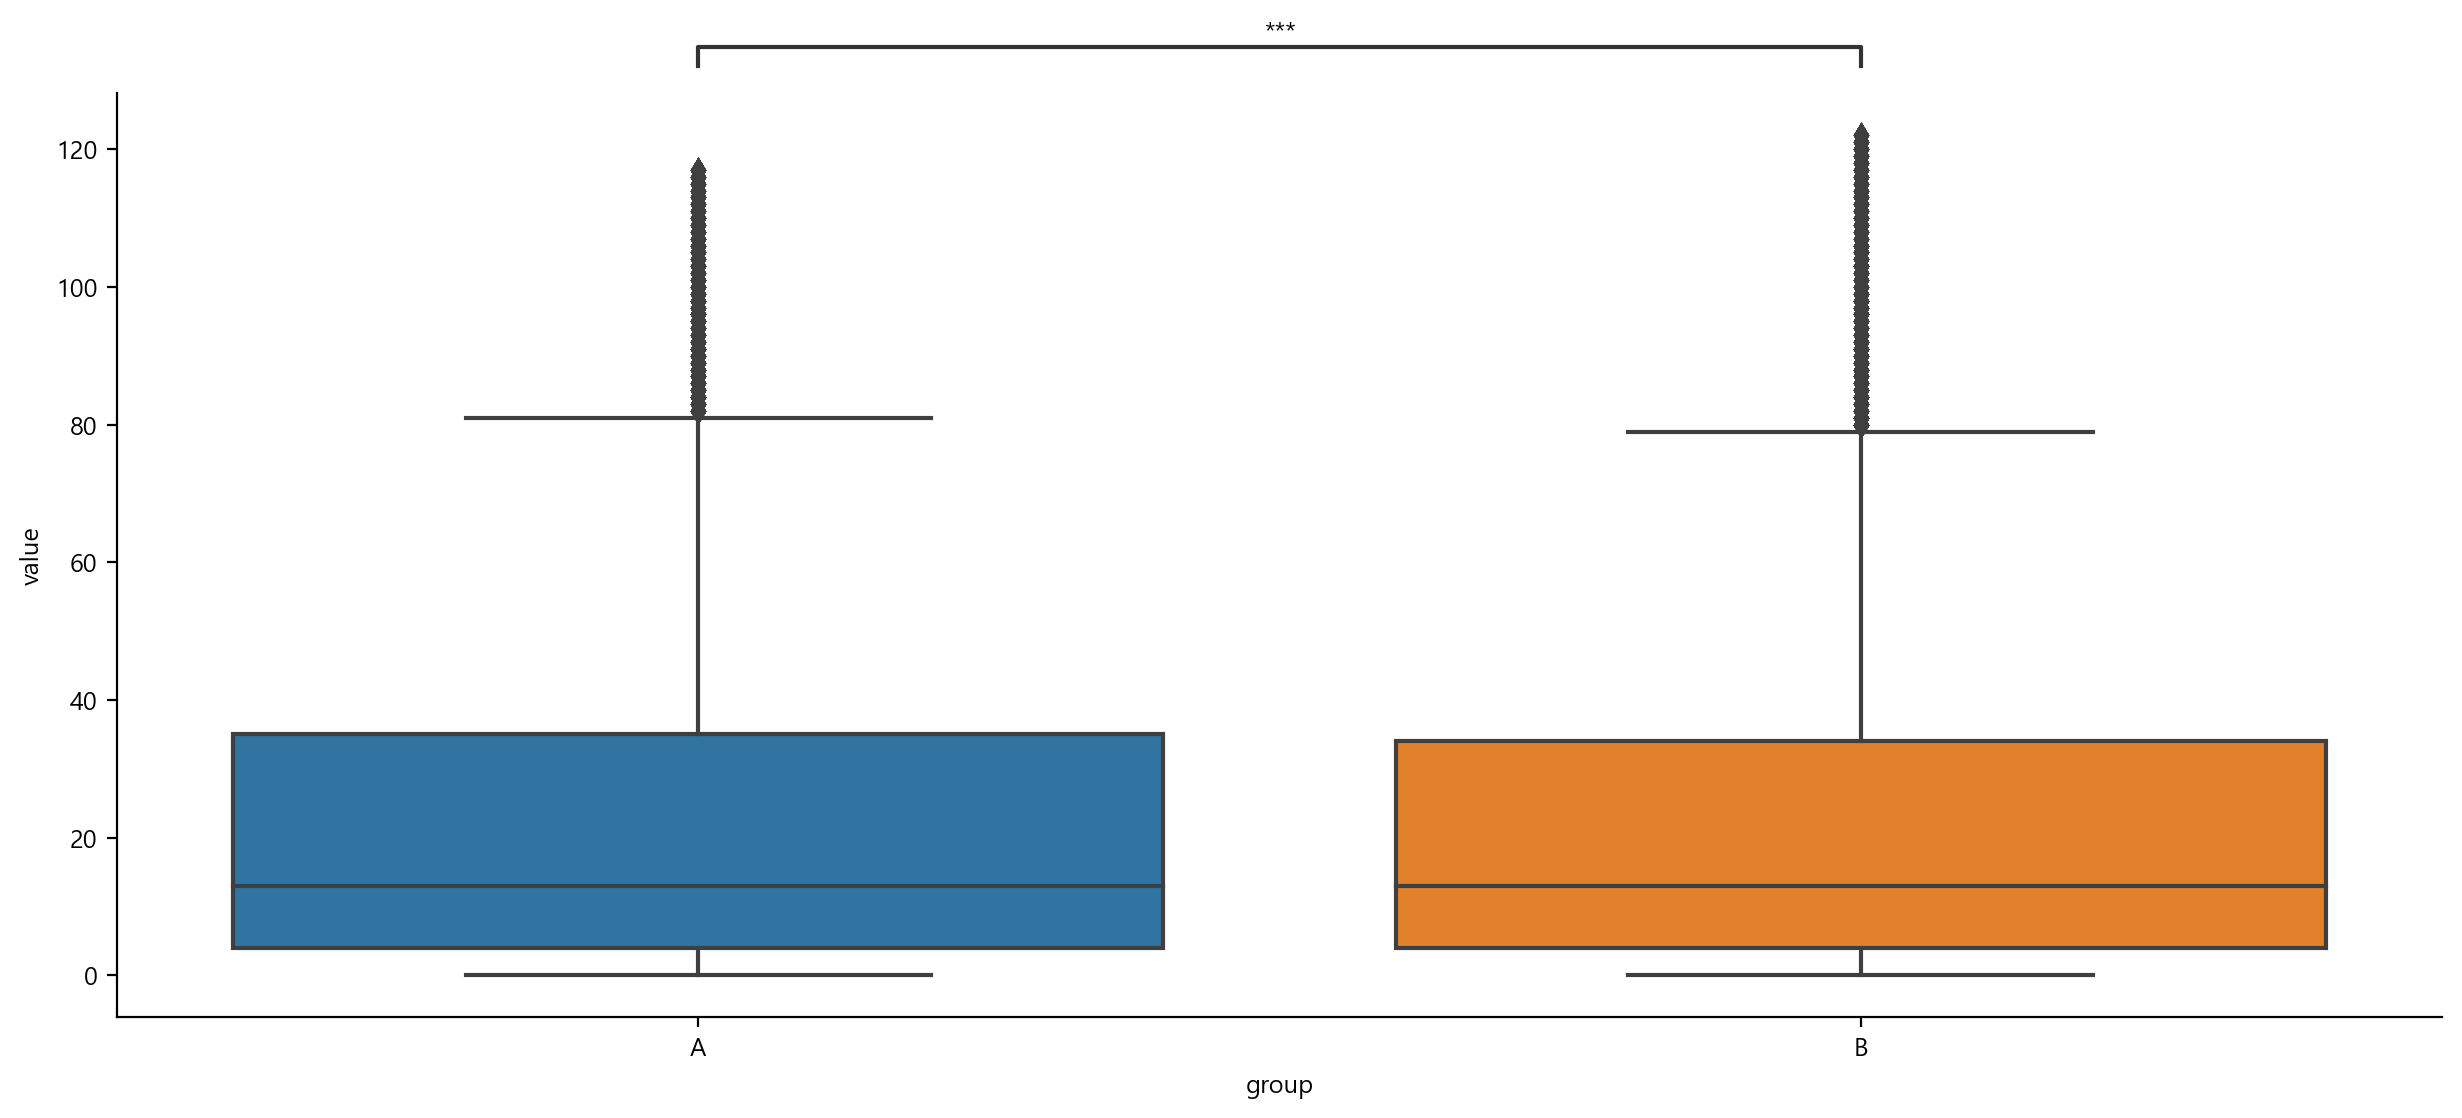

In [42]:
data = melt(df, var_name="group", value_name="value")

config = {
    "data": data,
    "x": "group",
    "y": "value",
    "pairs": [("A", "B")],
    # t-test_ind(독립,등분산), t-test_welch(독립,이분산)
    # t-test_paired(대응,등분산), Mann-Whitney(대응,이분산), Mann-Whitney-gt, Mann-Whitney-ls
    # Levene(분산분석), Wilcoxon, Kruskal
    "test": "t-test_welch",
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()